# CNN 실습 세션 과제
---
- 출제자 : 김서진 이성균
- 기한 : 2023/08/26 23:59
- 기수/이름 : 9기 박서연


## Part1. Tutorial for Pytorch and CNN
- 개인 공부를 위한 부분으로 별도로 빈칸을 채우는 부분은 없습니다.
- 각자 코드를 실행시켜보며 CNN과 pytorch 기초를 공부해보세요!
- 출처 : 8기 학술부 CNN 세션 과제

#### 파이토치(PyTorch) 기초문법

* 페이스북이 초기 루아(Lua) 언어로 개발된 토치(Torch)를 파이썬 버전으로 개발하여 2017년도에 공개
* 초기에 토치(Torch)는 넘파이(NumPy) 라이브러리처럼 과학 연산을 위한 라이브러리로 공개
* 이후 GPU를 이용한 텐서 조작 및 동적 신경망 구축이 가능하도록 딥러닝 프레임워크로 발전시킴
* 파이썬답게 만들어졌고, 유연하면서도 가속화된 계산 속도를 제공

#### 파이토치 모듈 구조

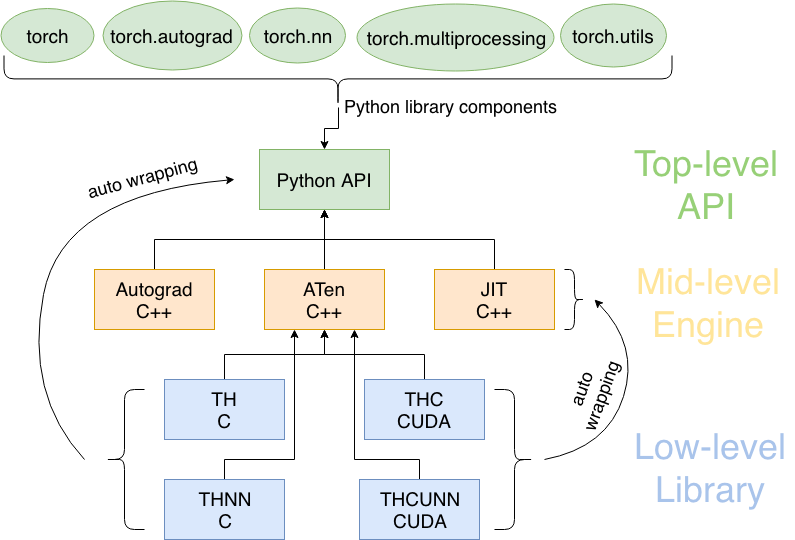

<small>출처: Deep Learning with PyTorch by Eli Stevens Luca Antiga. MEAP Publication. https://livebook.manning.com/#!/book/deep-learning-with-pytorch/welcome/v-7/</small>

#### 파이토치의 구성요소

- `torch`: 메인 네임스페이스, 텐서 등의 다양한 수학 함수가 포함
- `torch.autograd`: 자동 미분 기능을 제공하는 라이브러리
- `torch.nn`: 신경망 구축을 위한 데이터 구조나 레이어 등의 라이브러리
- `torch.multiprocessing`: 병럴처리 기능을 제공하는 라이브러리
- `torch.optim`: SGD(Stochastic Gradient Descent)를 중심으로 한 파라미터 최적화 알고리즘 제공
- `torch.utils`: 데이터 조작 등 유틸리티 기능 제공
- `torch.onnx`: ONNX(Open Neural Network Exchange), 서로 다른 프레임워크 간의 모델을 공유할 때 사용

In [190]:
import torch

torch.__version__

'2.0.1+cu118'

#### 텐서(Tensors)

* 데이터 표현을 위한 기본 구조로 텐서(tensor)를 사용
* 텐서는 데이터를 담기위한 컨테이너(container)로서 일반적으로 수치형 데이터를 저장
* 넘파이(NumPy)의 ndarray와 유사
* GPU를 사용한 연산 가속 가능

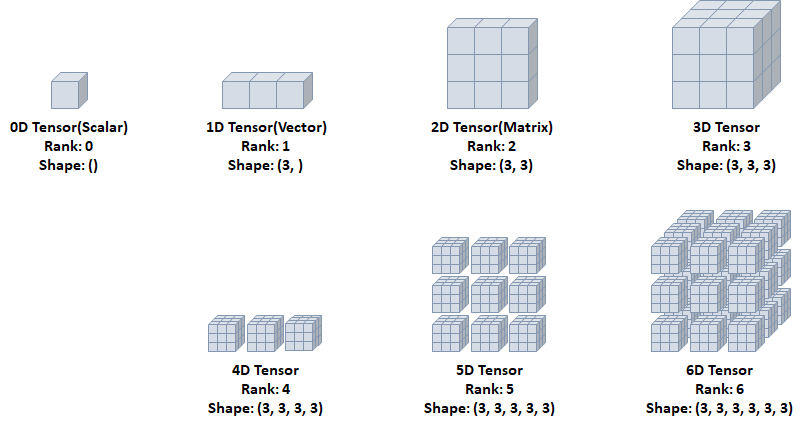

##### 텐서 초기화와 데이터 타입

초기화 되지 않은 텐서

In [191]:
# empty()
# 4x2 matrix tensor

x = torch.empty(4,2)
x # random값이 들어있다.

tensor([[9.6441e-34, 4.4466e-41],
        [9.6441e-34, 4.4466e-41],
        [6.0711e-34, 4.4466e-41],
        [6.0711e-34, 4.4466e-41]])

무작위로 초기화된 텐서

In [192]:
# randn()
# 4x2 matrix tensor

x = torch.randn(4,2)
x

tensor([[-1.4728,  0.2736],
        [ 0.5028,  0.3338],
        [ 0.0499,  0.8220],
        [ 0.4188, -0.0881]])

데이터 타입(dtype)이 long이고, 0으로 채워진 텐서

In [193]:
# zeros() & dtype
# long = 정수형

x = torch.zeros(4,2, dtype=torch.long)
x

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])

사용자가 입력한 값으로 텐서 초기화

In [194]:
# tensor()

x = torch.tensor([3, 2.3])
x

tensor([3.0000, 2.3000])

2 x 4 크기, double 타입, 1로 채워진 텐서

In [195]:
# new_ones()

x = x.new_ones(2,4, dtype=torch.double)
x

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)

x와 같은 크기, float 타입, 무작위로 채워진 텐서

In [196]:
# randn_like()

x = torch.randn_like(x, dtype=torch.float)
x

tensor([[-0.6580,  2.3788, -1.6852,  0.0480],
        [ 0.5021,  0.5354, -0.1113, -0.3216]])

텐서의 크기 계산

In [197]:
# .size()

x.size()

torch.Size([2, 4])

##### 데이터 타입(Data Type)

| Data type | dtype | CPU tensor | GPU tensor |
| ------ | ------ | ------ | ------ |
| 32-bit floating point | `torch.float32` or `torch.float` |`torch.FloatTensor` | `torch.cuda.FloatTensor` |
| 64-bit floating point | `torch.float64` or `torch.double` |`torch.DoubleTensor` | `torch.cuda.DoubleTensor` |
| 16-bit floating point | `torch.float16` or `torch.half` |`torch.HalfTensor` | `torch.cuda.HalfTensor` |
| 8-bit integer(unsinged) | `torch.uint8` |`torch.ByteTensor` | `torch.cuda.ByteTensor` |
| 8-bit integer(singed) | `torch.int8` |`torch.CharTensor` | `torch.cuda.CharTensor` |
| 16-bit integer(signed) | `torch.int16` or `torch.short` |`torch.ShortTensor` | `torch.cuda.ShortTensor` |
| 32-bit integer(signed) | `torch.int32` or `torch.int` |`torch.IntTensor` | `torch.cuda.IntTensor` |
| 64-bit integer(signed) | `torch.int64` or `torch.long` |`torch.LongTensor` | `torch.cuda.LongTensor` |

In [198]:
# FloatTensor()

ft = torch.FloatTensor([1,2,3])
print(ft)
print(ft.dtype) # default = float32

tensor([1., 2., 3.])
torch.float32


In [199]:
# int

print(ft.short()) # 짧은 메모리의 정수; 16bits
print(ft.int()) # 중간 메모리의 정수; 32bits
print(ft.long()) # 긴 메모리의 정수; 64bits

tensor([1, 2, 3], dtype=torch.int16)
tensor([1, 2, 3], dtype=torch.int32)
tensor([1, 2, 3])


In [200]:
# IntTensor()

it = torch.IntTensor([1,2,3])
print(it)
print(it.dtype)

tensor([1, 2, 3], dtype=torch.int32)
torch.int32


In [201]:
# float

print(it.float()) # 32bits
print(it.double()) # 64bits
print(it.half()) # 16bits

tensor([1., 2., 3.])
tensor([1., 2., 3.], dtype=torch.float64)
tensor([1., 2., 3.], dtype=torch.float16)


##### CUDA Tensors

- `.to` 메소드를 사용하여 텐서를 어떠한 장치(cpu, gpu)로도 옮길 수 있음

In [202]:
x  = torch.randn(1)
print(x) # tensor로 관찰
print(x.item()) # 실제 값; 더 길게 확인됨
print(x.dtype) # 자료형; 실수

tensor([-2.2952])
-2.2951576709747314
torch.float32


In [203]:
# torch.cuda.is_available() -> True이면, 'cuda'로 device가 계산됨
# torch.cuda.is_available() -> False이면, 'cpu'로 device가 계산됨

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

# 아래 두개를 조건문으로 나눈 것

device(type='cuda')

In [204]:
torch.device('cuda')

device(type='cuda')

In [205]:
torch.device('cpu')

device(type='cpu')

In [206]:
# x라는 스칼라 tensor와 크기가 같은 1값만 있는 tensor를, cuda를 이용하도록 선언

y = torch.ones_like(x, device=device)
y

tensor([1.], device='cuda:0')

In [207]:
# 기존에 그냥 cpu로 정의된 tensor를 cuda로 바꿔서 선언

x = x.to(device)
x

tensor([-2.2952], device='cuda:0')

In [208]:
z = x + y
print(z) # cuda로 정의된 tensor끼리 합
print(z.to('cpu', torch.double)) # cpu로 다시 재정의

tensor([-1.2952], device='cuda:0')
tensor([-1.2952], dtype=torch.float64)


##### 다차원 텐서 표현

0D Tensor(Scalar)

* 하나의 숫자를 담고 있는 텐서(tensor)
* 축과 형상이 없음

In [209]:
t0 = torch.tensor(0)
print(t0.ndim) # dim = 0; scaler
print(t0.shape) # size = []; scaler
print(t0) # 값도 tensor 0

0
torch.Size([])
tensor(0)


1D Tensor(Vector)

* 값들을 저장한 리스트와 유사한 텐서
* 하나의 축이 존재

In [210]:
t1 = torch.tensor([1,2,3])
print(t1.ndim)
print(t1.shape)
print(t1)

1
torch.Size([3])
tensor([1, 2, 3])


2D Tensor(Matrix)

* 행렬과 같은 모양으로 두개의 축이 존재
* 일반적인 수치, 통계 데이터셋이 해당
* 주로 샘플(samples)과 특성(features)을 가진 구조로 사용

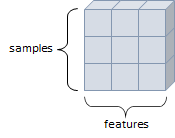

In [211]:
t2 = torch.tensor([[1,2,3],
                   [4,5,6],
                   [7,8,9]])
print(t2.ndim)
print(t2.shape)
print(t2)

2
torch.Size([3, 3])
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


3D Tensor

* 큐브(cube)와 같은 모양으로 세개의 축이 존재
* 데이터가 연속된 시퀀스 데이터나 시간 축이 포함된 시계열 데이터에 해당
* 주식 가격 데이터셋, 시간에 따른 질병 발병 데이터 등이 존재
* 주로 샘플(samples), 타임스텝(timesteps), 특성(features)을 가진 구조로 사용

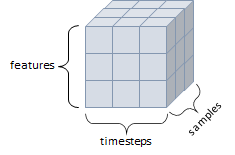

In [212]:
t3 = torch.tensor([
                   [[1,2,3],
                   [4,5,6],
                   [7,8,9]],

                   [[1,2,3],
                   [4,5,6],
                   [7,8,9]],

                   [[1,2,3],
                   [4,5,6],
                   [7,8,9]]
                   ])
print(t3.ndim)
print(t3.shape)
print(t3)

3
torch.Size([3, 3, 3])
tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],

        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],

        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])


4D Tensor

* 4개의 축
* 컬러 이미지 데이터가 대표적인 사례 (흑백 이미지 데이터는 3D Tensor로 가능)
* 주로 샘플(samples), 높이(height), 너비(width), 컬러 채널(channel)을 가진 구조로 사용

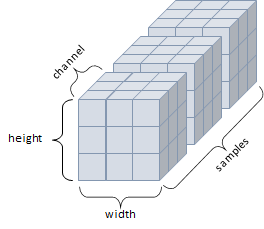

5D Tensor

* 5개의 축
* 비디오 데이터가 대표적인 사례
* 주로 샘플(samples), 프레임(frames), 높이(height), 너비(width), 컬러 채널(channel)을 가진 구조로 사용

##### 텐서의 연산(Operations)

* 텐서에 대한 수학 연산, 삼각함수, 비트 연산, 비교 연산, 집계 등 제공

In [213]:
import math

a = torch.randn(1,2) * 2 - 1
a

tensor([[-0.8477, -1.7030]])

In [214]:
print(torch.abs(a))
print(torch.ceil(a)) # 올림
print(torch.floor(a)) # 내림
print(torch.clamp(a, -0.5, 0.5)) # 최대값과 최솟값이 이 범위를 넘으면, 이 범위값으로 만든다.

tensor([[0.8477, 1.7030]])
tensor([[-0., -1.]])
tensor([[-1., -2.]])
tensor([[-0.5000, -0.5000]])


In [215]:
print(torch.min(a))
print(torch.max(a))
print(torch.mean(a))
print(torch.std(a))
print(torch.prod(a))
print(torch.unique(torch.tensor([1,2,3,1,2,3])))

tensor(-1.7030)
tensor(-0.8477)
tensor(-1.2753)
tensor(0.6048)
tensor(1.4436)
tensor([1, 2, 3])


`max`와 `min`은 `dim` 인자를 줄 경우 argmax와 argmin도 함께 리턴
- argmax: 최대값을 가진 인덱스
- argmin: 최소값을 가진 인덱스



In [216]:
x = torch.randn(2,2)
print(x, '\n')

print(x.max(dim=0)) # 같은 열기준, 행끼리 비교
print(x.max(dim=1)) # 같은 행기준, 열끼리 비교

tensor([[ 0.0851,  0.7153],
        [ 0.0320, -0.4730]]) 

torch.return_types.max(
values=tensor([0.0851, 0.7153]),
indices=tensor([0, 0]))
torch.return_types.max(
values=tensor([0.7153, 0.0320]),
indices=tensor([1, 0]))


In [217]:
x = torch.randn(2,2)
print(x, '\n')

print(x.min(dim=0)) # 같은 열기준, 행끼리 비교
print(x.min(dim=1)) # 같은 행기준, 열끼리 비교

tensor([[1.6433, 1.5917],
        [0.0391, 1.0367]]) 

torch.return_types.min(
values=tensor([0.0391, 1.0367]),
indices=tensor([1, 1]))
torch.return_types.min(
values=tensor([1.5917, 0.0391]),
indices=tensor([1, 0]))


In [218]:
x = torch.randn(2,2)
print(x)
y = torch.randn(2,2)
print(y)

tensor([[-0.3696, -0.5555],
        [ 0.0727, -0.5769]])
tensor([[ 0.1229,  1.2220],
        [-2.1142,  1.8856]])


`torch.add`: 덧셈

In [219]:
# add(); 동일한 두 방법
print(x + y)
print(torch.add(x,y))

tensor([[-0.2467,  0.6665],
        [-2.0415,  1.3087]])
tensor([[-0.2467,  0.6665],
        [-2.0415,  1.3087]])


결과 텐서를 인자로 제공

In [220]:
result = torch.empty(2,4)
torch.add(x,y, out=result) # x+y를 result에 저장한다.
result

<ipython-input-220-508e5872cf36>:2: UserWarning: An output with one or more elements was resized since it had shape [2, 4], which does not match the required output shape [2, 2]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at ../aten/src/ATen/native/Resize.cpp:26.)
  torch.add(x,y, out=result) # x+y를 result에 저장한다.


tensor([[-0.2467,  0.6665],
        [-2.0415,  1.3087]])

`in-place` 방식
  - in-place방식으로 텐서의 값을 변경하는 연산 뒤에는 _''가 붙음
  - `x.copy_(y), x.t_()`

In [221]:
print(x)
print(y, '\n')

y.add_(x) # y = y + x; replace
print(y)

tensor([[-0.3696, -0.5555],
        [ 0.0727, -0.5769]])
tensor([[ 0.1229,  1.2220],
        [-2.1142,  1.8856]]) 

tensor([[-0.2467,  0.6665],
        [-2.0415,  1.3087]])


`torch.sub`: 뺄셈

In [222]:
print(x)
print(y, '\n')

print(x - y)
print(torch.sub(x, y))
print(x.sub(y))

tensor([[-0.3696, -0.5555],
        [ 0.0727, -0.5769]])
tensor([[-0.2467,  0.6665],
        [-2.0415,  1.3087]]) 

tensor([[-0.1229, -1.2220],
        [ 2.1142, -1.8856]])
tensor([[-0.1229, -1.2220],
        [ 2.1142, -1.8856]])
tensor([[-0.1229, -1.2220],
        [ 2.1142, -1.8856]])


`torch.mul`: 곱셉 <- 각 행렬이 같은 사이즈이면, 각은 원소끼리 곱한다.

In [223]:
print(x)
print(y, '\n')

print(x * y)
print(torch.mul(x, y))
print(x.mul(y))

tensor([[-0.3696, -0.5555],
        [ 0.0727, -0.5769]])
tensor([[-0.2467,  0.6665],
        [-2.0415,  1.3087]]) 

tensor([[ 0.0912, -0.3702],
        [-0.1484, -0.7550]])
tensor([[ 0.0912, -0.3702],
        [-0.1484, -0.7550]])
tensor([[ 0.0912, -0.3702],
        [-0.1484, -0.7550]])


`torch.div`: 나눗셈

In [224]:
print(x)
print(y, '\n')

print(x / y)
print(torch.div(x, y))
print(x.div(y))

tensor([[-0.3696, -0.5555],
        [ 0.0727, -0.5769]])
tensor([[-0.2467,  0.6665],
        [-2.0415,  1.3087]]) 

tensor([[ 1.4981, -0.8333],
        [-0.0356, -0.4408]])
tensor([[ 1.4981, -0.8333],
        [-0.0356, -0.4408]])
tensor([[ 1.4981, -0.8333],
        [-0.0356, -0.4408]])


`torch.mm`: 내적(dot product) <- 우리가 흔히 아는 행렬 곱

In [225]:
print(x)
print(y, '\n')

# 내적
print(torch.matmul(x, y))
z = torch.mm(x, y)
print(z, '\n')

# svd
print(torch.svd(z))

tensor([[-0.3696, -0.5555],
        [ 0.0727, -0.5769]])
tensor([[-0.2467,  0.6665],
        [-2.0415,  1.3087]]) 

tensor([[ 1.2251, -0.9733],
        [ 1.1598, -0.7065]])
tensor([[ 1.2251, -0.9733],
        [ 1.1598, -0.7065]]) 

torch.return_types.svd(
U=tensor([[-0.7556, -0.6551],
        [-0.6551,  0.7556]]),
S=tensor([2.0679, 0.1273]),
V=tensor([[-0.8150,  0.5794],
        [ 0.5794,  0.8150]]))


##### 텐서의 조작(Manipulations)

인덱싱(Indexing): NumPy처럼 인덱싱 형태로 사용가능

In [226]:
x = torch.Tensor([[1,2],
                  [3,4]])

print(x)

# indexing; (행,열)
print(x[0,0])
print(x[0,1])
print(x[1,0])
print(x[1,1], '\n')

# slicing
print(x[:, 0])
print(x[:, 1], '\n')

print(x[0, :])
print(x[1, :], '\n')

tensor([[1., 2.],
        [3., 4.]])
tensor(1.)
tensor(2.)
tensor(3.)
tensor(4.) 

tensor([1., 3.])
tensor([2., 4.]) 

tensor([1., 2.])
tensor([3., 4.]) 



`view`: 텐서의 크기(size)나 모양(shape)을 변경

- 기본적으로 변경 전과 후에 텐서 안의 원소 개수가 유지되어야 함
- -1로 설정되면 계산을 통해 해당 크기값을 유추

In [227]:
x = torch.randn(4,5)
print(x, '\n')

y = x.view(20) # (20,)
print(y, '\n')

z = x.view(5,-1) # (5,4)
print(z, '\n')

tensor([[ 0.7414,  1.2326,  0.3287,  2.1160, -0.0740],
        [ 2.0161,  0.1958,  1.8316,  0.2661, -0.1433],
        [-1.5448,  0.8892,  0.4738, -0.0468, -0.2757],
        [ 0.6797,  1.1439, -0.9466,  1.2123, -1.0886]]) 

tensor([ 0.7414,  1.2326,  0.3287,  2.1160, -0.0740,  2.0161,  0.1958,  1.8316,
         0.2661, -0.1433, -1.5448,  0.8892,  0.4738, -0.0468, -0.2757,  0.6797,
         1.1439, -0.9466,  1.2123, -1.0886]) 

tensor([[ 0.7414,  1.2326,  0.3287,  2.1160],
        [-0.0740,  2.0161,  0.1958,  1.8316],
        [ 0.2661, -0.1433, -1.5448,  0.8892],
        [ 0.4738, -0.0468, -0.2757,  0.6797],
        [ 1.1439, -0.9466,  1.2123, -1.0886]]) 



`item`: 텐서에 값이 단 하나라도 존재하면 숫자값을 얻을 수 있음


In [228]:
x = torch.randn(1)
print(x, '\n')

print(x.item()) # tensor안의 value를 가져옴!
print(x.dtype)

tensor([1.2358]) 

1.2358043193817139
torch.float32


스칼라값 하나만 존재해야 `item()` 사용 가능

In [229]:
# x = torch.randn(2) # scaler가 아니면 안됨
# print(x, '\n')

# print(x.item()) # tensor안의 value를 가져옴!
# print(x.dtype)

`squeeze`: 차원을 축소(제거)

In [230]:
tensor = torch.randn(1,3,3) # (1,3,3) size의 tensor로 만들어준다.
print(tensor)
print(tensor.shape)

tensor([[[-1.0127,  0.6577, -0.4146],
         [ 1.1058, -0.5230, -0.9780],
         [ 1.5928, -0.5568,  0.0893]]])
torch.Size([1, 3, 3])


In [231]:
t = tensor.squeeze() # (1,3,3) -> (3,3) 으로 앞의 차원을 하나 없앤다.
print(t)
print(t.shape)

tensor([[-1.0127,  0.6577, -0.4146],
        [ 1.1058, -0.5230, -0.9780],
        [ 1.5928, -0.5568,  0.0893]])
torch.Size([3, 3])


`unsqueeze`: 차원을 증가(생성)

In [232]:
t = torch.randn(3,3) # (3,3)
print(t)
print(t.shape)

tensor([[ 0.7943, -0.2007, -1.0367],
        [ 1.0003, -0.0766, -1.7294],
        [-0.1431, -1.4001,  0.2805]])
torch.Size([3, 3])


In [233]:
tensor = t.unsqueeze(dim=0) # (3,3)인 t의 첫번째 차원(dim=0)을 늘려라
print(tensor)
print(tensor.shape) # (1,3,3)

tensor([[[ 0.7943, -0.2007, -1.0367],
         [ 1.0003, -0.0766, -1.7294],
         [-0.1431, -1.4001,  0.2805]]])
torch.Size([1, 3, 3])


In [234]:
tensor = t.unsqueeze(dim=1) # (3,3)인 t의 두번째 차원(dim=1)을 늘려라
print(tensor)
print(tensor.shape) # (3,1,3)

tensor([[[ 0.7943, -0.2007, -1.0367]],

        [[ 1.0003, -0.0766, -1.7294]],

        [[-0.1431, -1.4001,  0.2805]]])
torch.Size([3, 1, 3])


`stack`: 텐서간 결합

In [235]:
x = torch.FloatTensor([1,4])
print(x)
y = torch.FloatTensor([2,5])
print(y)
z = torch.FloatTensor([3,6])
print(z, '\n')

print(torch.stack([x,y,z])) # 위 아래로 합쳐준다.

tensor([1., 4.])
tensor([2., 5.])
tensor([3., 6.]) 

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


`cat`: 텐서를 결합하는 메소드(concatenate)

- 넘파이의 `stack`과 유사하지만, 쌓을 `dim`이 존재해야함
- 해당 차원을 늘려준 후 결합


In [236]:
a = torch.randn(1,3,3)
print(a)
b= torch.randn(1,3,3)
print(b, '\n')
c = torch.cat((a,b), dim=0) # 1번째 차원을 기준으로 합친다.
print(c)
print(c.shape) # (2,3,3)

tensor([[[ 0.9930, -0.2171, -1.2273],
         [ 0.1371,  0.3396,  0.3430],
         [ 2.4033, -2.1957, -0.4646]]])
tensor([[[ 0.9111,  1.3119, -1.4106],
         [-1.2106, -1.0085, -1.0436],
         [-0.2347,  0.9163,  0.1905]]]) 

tensor([[[ 0.9930, -0.2171, -1.2273],
         [ 0.1371,  0.3396,  0.3430],
         [ 2.4033, -2.1957, -0.4646]],

        [[ 0.9111,  1.3119, -1.4106],
         [-1.2106, -1.0085, -1.0436],
         [-0.2347,  0.9163,  0.1905]]])
torch.Size([2, 3, 3])


In [237]:
a = torch.randn(1,3,3)
print(a)
b= torch.randn(1,3,3)
print(b, '\n')
c = torch.cat((a,b), dim=1) # 2번째 차원을 기준으로 합친다.
print(c)
print(c.shape) # (1,6,3)

tensor([[[-0.3790, -0.8152, -0.9033],
         [ 0.2323,  1.0648,  0.6869],
         [ 0.3465,  0.4572, -2.1123]]])
tensor([[[ 0.6177, -1.3773, -0.0018],
         [ 1.4235,  0.3797, -0.2388],
         [ 0.5995,  1.3694, -0.9334]]]) 

tensor([[[-3.7898e-01, -8.1521e-01, -9.0330e-01],
         [ 2.3229e-01,  1.0648e+00,  6.8690e-01],
         [ 3.4650e-01,  4.5717e-01, -2.1123e+00],
         [ 6.1769e-01, -1.3773e+00, -1.7629e-03],
         [ 1.4235e+00,  3.7970e-01, -2.3878e-01],
         [ 5.9949e-01,  1.3694e+00, -9.3339e-01]]])
torch.Size([1, 6, 3])


In [238]:
a = torch.randn(1,3,3)
print(a)
b= torch.randn(1,3,3)
print(b, '\n')
c = torch.cat((a,b), dim=2) # 3번째 차원을 기준으로 합친다.
print(c)
print(c.shape) # (1,3,6)

tensor([[[-0.4371,  0.8429, -1.1067],
         [ 0.4244, -1.0729, -3.1278],
         [ 0.1624,  1.2466, -0.1549]]])
tensor([[[-1.5008,  0.6225,  0.5009],
         [ 0.6908,  0.6747, -1.3363],
         [ 1.9057,  0.7916, -0.6602]]]) 

tensor([[[-0.4371,  0.8429, -1.1067, -1.5008,  0.6225,  0.5009],
         [ 0.4244, -1.0729, -3.1278,  0.6908,  0.6747, -1.3363],
         [ 0.1624,  1.2466, -0.1549,  1.9057,  0.7916, -0.6602]]])
torch.Size([1, 3, 6])


`chunk`: 텐서를 여러 개로 나눌 때 사용 (몇 개로 나눌 것인가?)

In [239]:
c = torch.cat((a,b), dim=1)
tensor = torch.rand(3,6)
print(tensor, '\n')

t1,t2,t3 = torch.chunk(tensor, 3, dim=1) # 2번째 차원을 3개로 나눈다.
print(t1)
print(t1.shape) # (3,2)
print(t2)
print(t2.shape) # (3,2)
print(t3)
print(t3.shape) # (3,2)

tensor([[0.7655, 0.4736, 0.4839, 0.0720, 0.0509, 0.2669],
        [0.0547, 0.1811, 0.7561, 0.6524, 0.1601, 0.6691],
        [0.1247, 0.7916, 0.2096, 0.6978, 0.7688, 0.1662]]) 

tensor([[0.7655, 0.4736],
        [0.0547, 0.1811],
        [0.1247, 0.7916]])
torch.Size([3, 2])
tensor([[0.4839, 0.0720],
        [0.7561, 0.6524],
        [0.2096, 0.6978]])
torch.Size([3, 2])
tensor([[0.0509, 0.2669],
        [0.1601, 0.6691],
        [0.7688, 0.1662]])
torch.Size([3, 2])


`split`: `chunk`와 동일한 기능이지만 조금 다름 (텐서의 크기는 몇인가?)

In [240]:
tensor = torch.randn(3,6)
t1,t2 = torch.split(tensor, 3, dim=1) # 2번째 차원을 3이라는 길이의 벡터로 나눈다.

print(tensor, '\n')
print(t1)
print(t1.shape) # (3,3)
print(t2)
print(t2.shape) # (3,3)

tensor([[ 0.0521, -0.5644,  0.0532, -0.3442,  0.1399, -0.7482],
        [-0.6644, -0.6869,  0.6390, -0.6177, -1.3341, -1.2846],
        [-1.7230,  0.3708, -1.2317, -0.4453,  1.0370, -2.9412]]) 

tensor([[ 0.0521, -0.5644,  0.0532],
        [-0.6644, -0.6869,  0.6390],
        [-1.7230,  0.3708, -1.2317]])
torch.Size([3, 3])
tensor([[-0.3442,  0.1399, -0.7482],
        [-0.6177, -1.3341, -1.2846],
        [-0.4453,  1.0370, -2.9412]])
torch.Size([3, 3])


torch ↔ numpy
- Torch Tensor(텐서)를 NumPy array(배열)로 변환 가능
  - `numpy()`
  - `from_numpy()`
- Tensor가 CPU상에 있다면 NumPy 배열은 메모리 공간을 공유하므로 하나가 변하면, 다른 하나도 변함

In [241]:
a = torch.ones(7)
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.])


In [242]:
# numpy() : tensor -> numpy

b = a.numpy() # numpy로 바꿔준다; 단, b라는 numpy가 a라는 tensor의 메모리를 공유한다.
# 단, cpu로 tensor가 정의될 때만 그렇다.
print(b)

[1. 1. 1. 1. 1. 1. 1.]


In [243]:
a.add_(1) # a에 1을 더한다.
print(a) # tensor에 1이 더해진다.
print(b) # numpy도 같은 메모리를 공유하기 때문에, 1이 더해진다.

tensor([2., 2., 2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2. 2. 2.]


In [244]:
# from_numpy() : numpy -> tensor

import numpy as np

a = np.ones(7)
b = torch.from_numpy(a)
np.add(a, 1, out=a)

print(a)
print(b) # numpy에 1을 더했더니, tensor도 1이 더해졌다.

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


#### Autograd(자동미분)

- `torch.autograd` 패키지는 Tensor의 모든 연산에 대해 **자동 미분** 제공
- 이는 코드를 어떻게 작성하여 실행하느냐에 따라 역전파가 정의된다는 뜻
- `backprop`를 위해 미분값을 자동으로 계산

`requires_grad` 속성을 `True`로 설정하면, 해당 텐서에서 이루어지는 모든 연산들을 추적하기 시작

기록을 추적하는 것을 중단하게 하려면, `.detach()`를 호출하여 연산기록으로부터 분리

In [245]:
# 실수형이어야 뒤에서 연산이 가능하다.

a = torch.arange(1,13, dtype=torch.float).view(3,-1)
a = a + 1

print(a)
print(a.requires_grad) # 기본적으로 False로 정의됨

tensor([[ 2.,  3.,  4.,  5.],
        [ 6.,  7.,  8.,  9.],
        [10., 11., 12., 13.]])
False


`requires_grad_(...)`는 기존 텐서의 `requires_grad` 값을 바꿔치기(`in-place`)하여 변경

`grad_fn`: 미분값을 계산한 함수에 대한 정보 저장 (어떤 함수에 대해서 backprop 했는지)

In [246]:
a * a # 각 행렬의 같은 원소끼리 곱한다. vs 행렬곱

tensor([[  4.,   9.,  16.,  25.],
        [ 36.,  49.,  64.,  81.],
        [100., 121., 144., 169.]])

In [247]:
a.requires_grad_(True)
print(a.requires_grad)

b = (a * a)
print(b) # grad_fn=<SumBackward0> 이 기록으로 남는다.
print(b.grad_fn) # grad_fn만 확인 가능
# 마지막으로 mul을 했다.

b = (a * a).sum()
print(b) # grad_fn=<SumBackward0> 이 기록으로 남는다.
print(b.grad_fn) # grad_fn만 확인 가능
# 마지막으로 sum을 했다.

True
tensor([[  4.,   9.,  16.,  25.],
        [ 36.,  49.,  64.,  81.],
        [100., 121., 144., 169.]], grad_fn=<MulBackward0>)
tensor(818., grad_fn=<SumBackward0>)


##### 기울기(Gradient)

In [248]:
x = torch.ones(3,3, requires_grad=True)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [249]:
y = x + 5
print(y)

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)


In [250]:
z = y * y # 행렬의 같은 위치의 원소끼리 곱한다.
out = z.mean() # 평균
print(z, out)

# z : 곱인 'grad_fn=<MulBackward0>'
# out : 평균인 'grad_fn=<MeanBackward0>'

tensor([[36., 36., 36.],
        [36., 36., 36.],
        [36., 36., 36.]], grad_fn=<MulBackward0>) tensor(36., grad_fn=<MeanBackward0>)


In [251]:
print(y.requires_grad) # 'requires_grad=True'인 x로 만든 y 또한 True이다.
print(z.requires_grad)
print(out.requires_grad)

True
True
True


참고자료 : https://deepinsight.tistory.com/84

다음 섹션에서 자세히 다룬다.

In [252]:
# 'requires_grad=True'를 해도, grad에 대한 backward 계산을 하지 않았기에
# .grad 안에는 None값이 들어가있다.
# 물론, .grad_fn 안에는 이전 연산이 들어가있다.

# .grad : 편미분값(value)
# .grad_fn : 편미분을 하기 위한 이전 연산

print(x.grad)
print(y.grad)
print(z.grad)
print(out.grad)

None
None
None
None


<ipython-input-252-205b3fc45312>:9: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:486.)
  print(y.grad)
<ipython-input-252-205b3fc45312>:10: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more 

계산이 완료된 후, `.backward()`를 호출하면 자동으로 역전파 계산이 가능하고, `.grad` 속성에 누적됨

In [253]:
print(out)
out.backward() # 2번 실행하면 오류가 발생한다.

tensor(36., grad_fn=<MeanBackward0>)


In [254]:
print(x.grad)
print(y.grad)
print(z.grad)
print(out.grad)

tensor([[1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333]])
None
None
None


<ipython-input-254-68aa1dcaf5e5>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:486.)
  print(y.grad)
<ipython-input-254-68aa1dcaf5e5>:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more i

`grad`: data가 거쳐온 layer에 대한 미분값 저장

In [255]:
print(x, '\n') # x라는 tensor에 grad라는 미분값이 저장되어 있다.
print(x.grad) # 실제 x의 grad를 살펴본 결과, 아래와 같다.

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True) 

tensor([[1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333]])


In [256]:
x = torch.randn(3, requires_grad=True)

y = x * 2

print(x, '\n')
print(y, '\n')
print(y.data.norm()) # 벡터의 크기인 것 같다.

tensor([-0.4267,  1.5318,  1.1662], requires_grad=True) 

tensor([-0.8534,  3.0636,  2.3323], grad_fn=<MulBackward0>) 

tensor(3.9438)


In [257]:
while y.data.norm() < 1000: # 벡터의 크기가 1000 이상이면, loop 탈출
    y = y * 2

print(y)

tensor([-218.4603,  784.2798,  597.0795], grad_fn=<MulBackward0>)


In [258]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([5.1200e+01, 5.1200e+02, 5.1200e-02])


`with torch.no_grad()`를 사용하여 기울기의 업데이트를 하지 않음

기록을 추적하는 것을 방지하기 위해 코드 블럭을 `with torch.no_grad()`로 감싸면 기울기 계산은 필요없지만, `requires_grad=True`로 설정되어 학습 가능한 매개변수를 갖는 모델을 평가(evaluate)할 때 유용

In [259]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad(): # 여기 안에서만 기울기계산을 하지 않는다; 평가할 때, 주로 이 기능을 사용
    print((x **2).requires_grad)

print((x **2).requires_grad)

True
True
False
True


`detach()`: 내용물(content)은 같지만 `require_grad`가 다른 새로운 Tensor를 가져올 때

In [260]:
print(x.requires_grad) # True
y = x.detach()
print(y.requires_grad) # False
print(x.eq(y).all()) # 값은 동이

True
False
tensor(True)


##### 자동 미분 흐름 예제

- 계산 흐름 $a \rightarrow b  \rightarrow c  \rightarrow out $

 $\quad \frac{\partial out}{\partial a} = ?$
- `backward()`를 통해 $a \leftarrow b  \leftarrow c  \leftarrow out $을 계산하면 $\frac{\partial out}{\partial a}$값이 `a.grad`에 채워짐


In [261]:
a = torch.ones(2,2, requires_grad=True)
print(a)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [262]:
print(a.data)
print(a.grad) # backward()을 통해 back-propagation을 하지 않았으므로, None
print(a.grad_fn) # 다른 변수를 통해 변수a가 만들어진 것이 아니므로, None
# a의 `grad_fn`이 None인 이유는 직접적으로 계산한 부분이 없었기 때문

tensor([[1., 1.],
        [1., 1.]])
None
None


$b = a + 2$

In [263]:
b = a + 2
print(b, '\n') # add

print(b.grad) # a를 기준으로 시작된 것이고 backward() 또한 진행하지 않았으므로, None
print(b.grad_fn, '\n') # 변수 a에 2를 더해 변수b가 만들어진 것이므로, Add

# 이전과 동일
print(a.grad) # backward()을 통해 back-propagation을 하지 않았으므로, None
print(a.grad_fn) # 다른 변수를 통해 변수a가 만들어진 것이 아니므로, None

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>) 

None

None
None


<ipython-input-263-738043c6725f>:4: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:486.)
  print(b.grad) # a를 기준으로 시작된 것이고 backward() 또한 진행하지 않았으므로, None


$c = b^2$

In [264]:
c = b ** 2
print(c) # pow

print(c.grad) # a를 기준으로 시작된 것이고 backward() 또한 진행하지 않았으므로, None
print(c.grad_fn, '\n') # 변수 b에 제곱을해서 변수c가 만들어진 것이므로, pow

# 이전과 동일
print(b.grad) # a를 기준으로 시작된 것이고 backward() 또한 진행하지 않았으므로, None
print(b.grad_fn, '\n') # 변수 a에 2를 더해 변수b가 만들어진 것이므로, Add

# 이전과 동일
print(a.grad) # backward()을 통해 back-propagation을 하지 않았으므로, None
print(a.grad_fn) # 다른 변수를 통해 변수a가 만들어진 것이 아니므로, None

tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)
None

None

None
None


<ipython-input-264-ea007655fd84>:4: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:486.)
  print(c.grad) # a를 기준으로 시작된 것이고 backward() 또한 진행하지 않았으므로, None
<ipython-input-264-ea007655fd84>:8: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See

In [265]:
out = c.sum()
print(out) # sum

print(out.grad) # a를 기준으로 시작된 것이고 backward() 또한 진행하지 않았으므로, None
print(out.grad_fn, '\n') # 변수 c를 합해서 변수out이 만들어진 것이므로, sum

print(c.grad) # a를 기준으로 시작된 것이고 backward() 또한 진행하지 않았으므로, None
print(c.grad_fn, '\n') # 변수 b에 제곱을해서 변수c가 만들어진 것이므로, pow

# 이전과 동일
print(b.grad) # a를 기준으로 시작된 것이고 backward() 또한 진행하지 않았으므로, None
print(b.grad_fn, '\n') # 변수 a에 2를 더해 변수b가 만들어진 것이므로, Add

# 이전과 동일
print(a.grad) # backward()을 통해 back-propagation을 하지 않았으므로, None
print(a.grad_fn) # 다른 변수를 통해 변수a가 만들어진 것이 아니므로, None

tensor(36., grad_fn=<SumBackward0>)
None

None

None

None
None


<ipython-input-265-810a29b28a73>:4: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:486.)
  print(out.grad) # a를 기준으로 시작된 것이고 backward() 또한 진행하지 않았으므로, None
<ipython-input-265-810a29b28a73>:7: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. S

backward()를 통해 back-propagation 진행
* 단, 처음 시작값인 a에 대해 편미분값이 계산된다. 나머지 중간값인 b,c는 계산이 되지 않는다.

In [266]:
# 최종값인 out에 대한 backward()

out.backward() # 2번 실행하면 오류발생, 위의 a부터 재정의가 필요

In [267]:
print(a.grad) # backward()을 통해 back-propagation을 하게 되었으므로
print(b.grad) # 중간값은 a부터가 아닌 b부터 다시 out을 만들어야할듯
print(c.grad)
print(out.grad)

tensor([[6., 6.],
        [6., 6.]])
None
None
None


<ipython-input-267-20185b187599>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:486.)
  print(b.grad) # 중간값은 a부터가 아닌 b부터 다시 out을 만들어야할듯
<ipython-input-267-20185b187599>:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pyt

In [79]:
print(a.data)
print(a.grad)
print(a.grad_fn, '\n\n')

print(b.data)
print(b.grad)
print(b.grad_fn, '\n\n')

print(c.data)
print(c.grad)
print(c.grad_fn, '\n\n')

print(out.data)
print(out.grad)
print(out.grad_fn, '\n\n')

tensor([[1., 1.],
        [1., 1.]])
tensor([[6., 6.],
        [6., 6.]])
None 


tensor([[3., 3.],
        [3., 3.]])
None


tensor([[9., 9.],
        [9., 9.]])
None


tensor(36.)
None




<ipython-input-79-b79c996a832b>:6: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:486.)
  print(b.grad)
<ipython-input-79-b79c996a832b>:10: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more in

#### 데이터 준비

파이토치에서는 데이터 준비를 위해 `torch.utils.data`의 `Dataset`과 `DataLoader` 사용 가능

- `Dataset`에는 다양한 데이터셋이 존재 (MNIST, FashionMNIST, CIFAR10, ...)
  - Vision Dataset: https://pytorch.org/vision/stable/datasets.html
  - Text Dataset: https://pytorch.org/text/stable/datasets.html
  - Audio Dataset: https://pytorch.org/audio/stable/datasets.html
- `DataLoader`와 `Dataset`을 통해 `batch_size`, `train` 여부, `transform` 등을 인자로 넣어 데이터를 어떻게 load할 것인지 정해줄 수 있음

In [80]:
from torch.utils.data import Dataset, DataLoader

토치비전(`torchvision`)은 파이토치에서 제공하는 데이터셋들이 모여있는 패키지

- `transforms`: 전처리할 때 사용하는 메소드 (https://pytorch.org/docs/stable/torchvision/transforms.html)
- `transforms`에서 제공하는 클래스 이외는 일반적으로 클래스를 따로 만들어 전처리 단계를 진행


In [81]:
import torchvision.transforms as transforms
from torchvision import datasets

`DataLoader`의 인자로 들어갈 `transform`을 미리 정의할 수 있고, `Compose`를 통해 리스트 안에 순서대로 전처리 진행

`ToTensor`()를 하는 이유는 `torchvision`이 PIL Image 형태로만 입력을 받기 때문에 데이터 처리를 위해서 Tensor형으로 변환 필요

In [82]:
mnist_transform = transforms.Compose([transforms.ToTensor(), # PIL Image -> Tensor
                                      transforms.Normalize(mean=(0.5,), std=(1.0,))]) # 정규화

In [83]:
trainset = datasets.MNIST(root='/content', # 이곳에 MNIST폴더안에 데이터가 저장된다.
                          train=True, download=True,
                          transform=mnist_transform) # 어떤 transform을 할 것인가

testset = datasets.MNIST(root='/content',
                         train=False, download=True,
                         transform=mnist_transform)

100%|██████████| 9912422/9912422 [00:00<00:00, 186082690.66it/s]

Extracting /content/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 45352187.88it/s]


Extracting /content/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 51001396.71it/s]

Extracting /content/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 21796943.67it/s]

Extracting /content/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/raw



In [84]:
# 변수안에 이렇게 저장이 되었다.

trainset

Dataset MNIST
    Number of datapoints: 60000
    Root location: /content
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(1.0,))
           )

trainset을 자세하게 살펴보자.

In [85]:
len(trainset) # 60,000개의 데이터

60000

In [86]:
trainset[0] # 1번째 데이터; image와 label이 저장되어있음

(tensor([[[-0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
           -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
           -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
           -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000],
          [-0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
           -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
           -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
           -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000],
          [-0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
           -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
           -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
           -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000],
          [-0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
           -0.5000, -0.5000, -0.500

In [87]:
trainset[0][0] # 1번째 데이터의 사진

tensor([[[-0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
          -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
          -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
          -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000],
         [-0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
          -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
          -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
          -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000],
         [-0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
          -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
          -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
          -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000],
         [-0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
          -0.5000, -0.5000, -0.5000, -0.5000, -0

In [88]:
trainset[0][0].shape # 1번째 데이터의 사진; [1, 28, 28] : 흑백차원, 가로, 세로

torch.Size([1, 28, 28])

In [89]:
trainset[0][1] # 1번째 데이터의 label

5

In [90]:
# 변수안에 이렇게 저장이 되었다.

testset

Dataset MNIST
    Number of datapoints: 10000
    Root location: /content
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(1.0,))
           )

`DataLoader`는 데이터 전체를 보관했다가 실제 모델 학습을 할 때 `batch_size` 크기만큼 데이터를 가져옴

In [91]:
# batch_size=8 : 데이터를 8개씩 가져온다.
# shuffle=True : 랜덤하게 섞는다.
# num_workers=2 : parallel하게 동작할 수 있도록 한다.
train_loader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)

# test이므로 shuffle=False
test_loader = DataLoader(trainset, batch_size=8, shuffle=False, num_workers=2)

In [92]:
# 이렇게 하면 확인이 불가능하다.

train_loader

In [93]:
# 다음 함수를 통해 DataLoader()안의 값을 확인할 수 있다.

dataiter = iter(train_loader) # 1개만 확인해보자
images, labels = next(dataiter) # 문법이 바뀜; x.next() -> next(x)
images.shape, labels.shape # tensor의 형태이다.
# 사진의 크기 28x28, 흑백(1), 사진 갯수 8개
# label 갯수 8개

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

In [94]:
images

tensor([[[[-0.5000, -0.5000, -0.5000,  ..., -0.5000, -0.5000, -0.5000],
          [-0.5000, -0.5000, -0.5000,  ..., -0.5000, -0.5000, -0.5000],
          [-0.5000, -0.5000, -0.5000,  ..., -0.5000, -0.5000, -0.5000],
          ...,
          [-0.5000, -0.5000, -0.5000,  ..., -0.5000, -0.5000, -0.5000],
          [-0.5000, -0.5000, -0.5000,  ..., -0.5000, -0.5000, -0.5000],
          [-0.5000, -0.5000, -0.5000,  ..., -0.5000, -0.5000, -0.5000]]],


        [[[-0.5000, -0.5000, -0.5000,  ..., -0.5000, -0.5000, -0.5000],
          [-0.5000, -0.5000, -0.5000,  ..., -0.5000, -0.5000, -0.5000],
          [-0.5000, -0.5000, -0.5000,  ..., -0.5000, -0.5000, -0.5000],
          ...,
          [-0.5000, -0.5000, -0.5000,  ..., -0.5000, -0.5000, -0.5000],
          [-0.5000, -0.5000, -0.5000,  ..., -0.5000, -0.5000, -0.5000],
          [-0.5000, -0.5000, -0.5000,  ..., -0.5000, -0.5000, -0.5000]]],


        [[[-0.5000, -0.5000, -0.5000,  ..., -0.5000, -0.5000, -0.5000],
          [-0.5000, -0.500

In [95]:
labels

tensor([7, 4, 6, 0, 5, 1, 5, 5])

In [96]:
torch_image = torch.squeeze(images[0]) # 8개 중에 1개의 이미지만 가져와서, 흑백(1)의 차원을 없애준다.
torch_image.shape

torch.Size([28, 28])

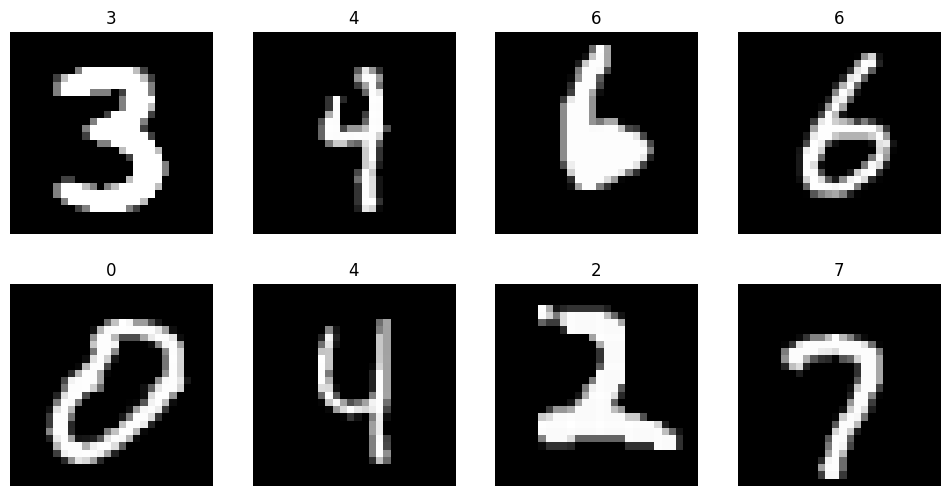

In [97]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(12,6))
cols, rows = 4, 2
for i in range(1, cols * rows + 1): # batch_size인 8개만 2행,4열로 가져오자.
    sample_idx = torch.randint(len(trainset), size=(1,)).item()
    # random으로 1~60,000개의 데이터 중에 하나를 선택한다.

    # len(trainset) : 60,000
    # size=(1,) : 1개 차원의 벡터
    # .item() : scaler형태의 tensor를 그냥 실수리스트로 가져옴.
    # 차원이 1인 scaler가 아니면, 사용이 불가능하다.

    img, label = trainset[sample_idx] # trainset의 하나를 랜덤으로 선택해서, img랑 label로 둔다.
    figure.add_subplot(rows, cols, i) # 어떤 영역에 그릴지 선택한다.
    plt.title(label) # 제목은 label로
    plt.axis('off') # 축이름은 없앤다.
    plt.imshow(img.squeeze(), cmap='gray') # img의 흑백차원을 없애고, 회색으로 시각화를 한다.
plt.show()

#### 신경망 구성

- 레이어(layer): 신경망의 핵심 데이터 구조로 하나 이상의 텐서를 입력받아 하나 이상의 텐서를 출력
- 모듈(module): 한 개 이상의 계층이 모여서 구성
- 모델(model): 한 개 이상의 모듈이 모여서 구성


개인적으로는 layer라는 의미보다는 filter가 더 맞다고 생각한다.

##### `torch.nn` 패키지

주로 가중치(weights), 편향(bias)값들이 내부에서 자동으로 생성되는 레이어들을 사용할 때 사용 (`weight`값들을 직접 선언 안함)

https://pytorch.org/docs/stable/nn.html


https://pytorch.org/docs/stable/generated/torch.nn.Module.html

In [98]:
import torch.nn as nn

`nn.Linear` 계층 예제

In [99]:
# input-features
input = torch.randn(128, 20) # (행,열)
print(input, '\n')

# layer
m = nn.Linear(20, 30) # in-features = 20, out-features = 30, bias(상수항)도 있다.
print(m, '\n')


# output
# input에 함수형태로 layer 적용
output = m(input)
print(output, '\n')

print(input.size())
print(output.size())

tensor([[-1.0778,  0.8958,  1.3591,  ...,  0.6087,  0.8110, -0.4802],
        [ 0.1180,  0.6942, -1.1018,  ..., -0.2048,  0.7050, -0.5292],
        [-0.9311,  1.4813, -0.0111,  ..., -3.1885,  1.0446,  0.9057],
        ...,
        [-0.1181, -0.2417, -0.9979,  ..., -1.3508, -1.4670,  0.4371],
        [ 0.8365,  0.9090,  2.0745,  ...,  0.5046, -0.0132, -1.0542],
        [-0.3889, -0.1540, -0.6181,  ..., -1.1656,  0.8117,  0.1421]]) 

Linear(in_features=20, out_features=30, bias=True) 

tensor([[-0.5721,  0.2231, -0.2697,  ...,  0.2562,  0.2729, -0.8653],
        [ 0.0341, -0.3977, -0.7180,  ..., -0.3762, -0.4030, -0.1528],
        [ 1.2691,  0.0238, -0.2553,  ...,  0.3114,  0.6566, -0.3297],
        ...,
        [ 0.4968,  0.2300,  0.8323,  ..., -0.0901,  0.5046, -0.7255],
        [-0.2697,  0.0112, -0.2950,  ...,  0.6055, -0.3804,  0.2705],
        [ 0.0920, -0.3573, -0.4866,  ...,  0.1410, -0.3917, -0.1586]],
       grad_fn=<AddmmBackward0>) 

torch.Size([128, 20])
torch.Size([128, 30]

`nn.Conv2d` 계층 예시
* Conv2d : 2차원 convolution-layer


In [100]:
input = torch.randn(20, 16, 50, 100)
print(input.size())

torch.Size([20, 16, 50, 100])


In [101]:
m = nn.Conv2d(in_channels=16, out_channels=33, kernel_size=3, stride=2)
m

Conv2d(16, 33, kernel_size=(3, 3), stride=(2, 2))

In [102]:
m = nn.Conv2d(in_channels=16, out_channels=33, kernel_size=(3,5), stride=(2,1), padding=(4,2))
m

Conv2d(16, 33, kernel_size=(3, 5), stride=(2, 1), padding=(4, 2))

In [103]:
m = nn.Conv2d(in_channels=16, out_channels=33, kernel_size=(3,5), stride=(2,1), padding=(4,2), dilation=(3,1))
m

Conv2d(16, 33, kernel_size=(3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))

In [104]:
output = m(input)
output.size()

torch.Size([20, 33, 26, 100])

##### 컨볼루션 레이어(Convolution Layers)

`nn.Conv2d` 예제

- `in_channels`: channel의 갯수
- `out_channels`: 출력 채널의 갯수
- `kernel_size`: 커널(필터) 사이즈

In [105]:
nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [106]:
nn.Conv2d(1, 20, 5, 1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [107]:
layer = nn.Conv2d(1, 20, 5, 1).to(torch.device('cpu')) # cpu에 저장
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

`weight` 확인

In [108]:
weight = layer.weight
weight.shape # weight(가중치)의 크기; (20,1) : in & out channels를 맞추기 위한 크기 / (5,5) : kernel(filter)-size

torch.Size([20, 1, 5, 5])

`weight`는 `detach()`를 통해 꺼내줘야 `numpy()`변환이 가능

In [109]:
weight = weight.detach()

In [110]:
weight = weight.numpy()
type(weight) # numpy

numpy.ndarray

In [111]:
weight.shape

(20, 1, 5, 5)

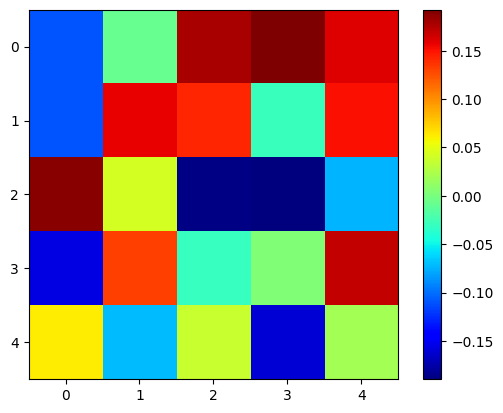

In [112]:
# imshow : numpy-matrix값을 시각화해준다.

plt.imshow(weight[0, 0, :, :], 'jet') # 'jet' : 화려하게
plt.colorbar()
plt.show()

In [113]:
print(images.shape) # 이전에 사용한 MNIST로부터 가져온 image데이터
print(images[0].size()) # 8 = batch_size, 1 = 흑/백, 28x28 pixel-size

input_image = torch.squeeze(images[0])
# images[0] : 한 batch당 8개의 데이터(사진)가 있는데, 이중에서 한개의 사진을 가져온다.
# squeeze() : 1 = 흑/백 의 차원을 제거한다.
print(input_image.size())

torch.Size([8, 1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])


In [114]:
input_data = torch.unsqueeze(images[0], dim=0) # 이전에 squeeze로 차원을 줄였는데, 다시 키워주자
print(input_data.size(), '\n')

torch.Size([1, 1, 28, 28]) 



In [115]:
output_data = layer(input_data)
output_data # grad_fn 도 포함되어 나온다.

tensor([[[[-0.3724, -0.3724, -0.3724,  ..., -0.3724, -0.3724, -0.3724],
          [-0.3724, -0.3724, -0.3724,  ..., -0.3724, -0.3724, -0.3724],
          [-0.3724, -0.3724, -0.3724,  ..., -0.3724, -0.3724, -0.3724],
          ...,
          [-0.3724, -0.3724, -0.3724,  ..., -0.3724, -0.3724, -0.3724],
          [-0.3724, -0.3724, -0.3724,  ..., -0.3724, -0.3724, -0.3724],
          [-0.3724, -0.3724, -0.3724,  ..., -0.3724, -0.3724, -0.3724]],

         [[ 0.5324,  0.5324,  0.5324,  ...,  0.5324,  0.5324,  0.5324],
          [ 0.5324,  0.5324,  0.5324,  ...,  0.5324,  0.5324,  0.5324],
          [ 0.5324,  0.5324,  0.5324,  ...,  0.5324,  0.5324,  0.5324],
          ...,
          [ 0.5324,  0.5324,  0.5324,  ...,  0.5324,  0.5324,  0.5324],
          [ 0.5324,  0.5324,  0.5324,  ...,  0.5324,  0.5324,  0.5324],
          [ 0.5324,  0.5324,  0.5324,  ...,  0.5324,  0.5324,  0.5324]],

         [[-0.1054, -0.1054, -0.1054,  ..., -0.1054, -0.1054, -0.1054],
          [-0.1054, -0.1054, -

In [116]:
output_data.size()

torch.Size([1, 20, 24, 24])

In [117]:
output = output_data.data # data값만 추출해서 얻을 수 있다.
output

tensor([[[[-0.3724, -0.3724, -0.3724,  ..., -0.3724, -0.3724, -0.3724],
          [-0.3724, -0.3724, -0.3724,  ..., -0.3724, -0.3724, -0.3724],
          [-0.3724, -0.3724, -0.3724,  ..., -0.3724, -0.3724, -0.3724],
          ...,
          [-0.3724, -0.3724, -0.3724,  ..., -0.3724, -0.3724, -0.3724],
          [-0.3724, -0.3724, -0.3724,  ..., -0.3724, -0.3724, -0.3724],
          [-0.3724, -0.3724, -0.3724,  ..., -0.3724, -0.3724, -0.3724]],

         [[ 0.5324,  0.5324,  0.5324,  ...,  0.5324,  0.5324,  0.5324],
          [ 0.5324,  0.5324,  0.5324,  ...,  0.5324,  0.5324,  0.5324],
          [ 0.5324,  0.5324,  0.5324,  ...,  0.5324,  0.5324,  0.5324],
          ...,
          [ 0.5324,  0.5324,  0.5324,  ...,  0.5324,  0.5324,  0.5324],
          [ 0.5324,  0.5324,  0.5324,  ...,  0.5324,  0.5324,  0.5324],
          [ 0.5324,  0.5324,  0.5324,  ...,  0.5324,  0.5324,  0.5324]],

         [[-0.1054, -0.1054, -0.1054,  ..., -0.1054, -0.1054, -0.1054],
          [-0.1054, -0.1054, -

In [118]:
output_arr = output.numpy()
output_arr

array([[[[-0.37241158, -0.37241158, -0.37241158, ..., -0.37241158,
          -0.37241158, -0.37241158],
         [-0.37241158, -0.37241158, -0.37241158, ..., -0.37241158,
          -0.37241158, -0.37241158],
         [-0.37241158, -0.37241158, -0.37241158, ..., -0.37241158,
          -0.37241158, -0.37241158],
         ...,
         [-0.37241158, -0.37241158, -0.37241158, ..., -0.37241158,
          -0.37241158, -0.37241158],
         [-0.37241158, -0.37241158, -0.37241158, ..., -0.37241158,
          -0.37241158, -0.37241158],
         [-0.37241158, -0.37241158, -0.37241158, ..., -0.37241158,
          -0.37241158, -0.37241158]],

        [[ 0.53244346,  0.53244346,  0.53244346, ...,  0.53244346,
           0.53244346,  0.53244346],
         [ 0.53244346,  0.53244346,  0.53244346, ...,  0.53244346,
           0.53244346,  0.53244346],
         [ 0.53244346,  0.53244346,  0.53244346, ...,  0.53244346,
           0.53244346,  0.53244346],
         ...,
         [ 0.53244346,  0.53244346

In [119]:
output_arr.shape

(1, 20, 24, 24)

In [120]:
# input : [1, 1, 28, 28]
# layer : nn.Conv2d(1, 20, 5, 1)
# output : [1, 20, 24, 24]

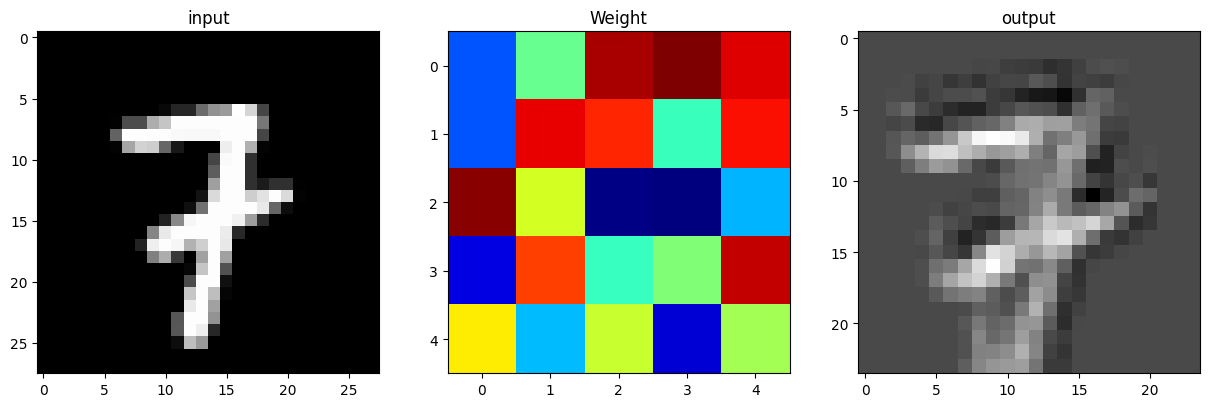

In [121]:
plt.figure(figsize=(15,30))

# input
plt.subplot(131)
plt.title('input')
plt.imshow(input_image, 'gray')

# filter
plt.subplot(132)
plt.title('Weight')
plt.imshow(weight[0,0,:,:], 'jet')

# output
plt.subplot(133)
plt.title('output')
plt.imshow(output_arr[0,0,:,:], 'gray')
plt.show()

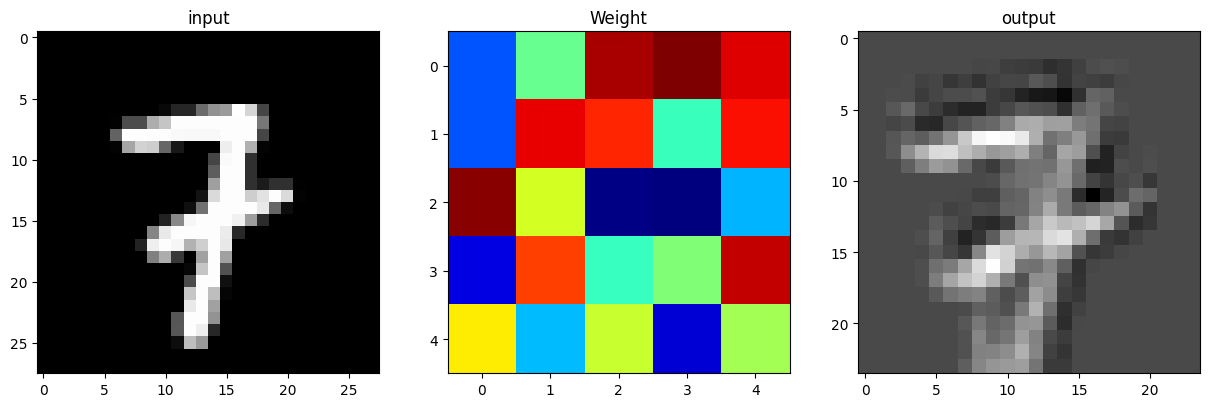

In [122]:
plt.figure(figsize=(15,30))

# input
plt.subplot(131)
plt.title('input')
plt.imshow(images[0,0,:,:], 'gray') # 1번쨰 데이터

# filter
plt.subplot(132)
plt.title('Weight')
plt.imshow(weight[0,0,:,:], 'jet') # 가중치를 1겹으로 보았을 때, filter라고 보면 됨

# output
plt.subplot(133)
plt.title('output')
plt.imshow(output_arr[0,0,:,:], 'gray') # 1번째 데이터에 filter를 적용했을 때, 데이터가 어떻게 되는지
plt.show()

##### 풀링 레이어(Pooling layers)

- `F.max_pool2d`
  - `stride`
  - `kernel_size`
- `torch.nn.MaxPool2d` 도 많이 사용

In [123]:
import torch.nn.functional as F

pool = F.max_pool2d(output, kernel_size=2, stride=2) # 2x2의 필터를 기준으로, 2만큼 이동하면서 큰 것만 뽑아줘

print(output.shape) # 24x24
print(pool.shape) # 12x12

torch.Size([1, 20, 24, 24])
torch.Size([1, 20, 12, 12])


In [124]:
output[0,0,10:14,10:14] # torch는 마지막을 포함한다.; 적용전

tensor([[-0.2264, -0.1768, -0.1612, -0.0795],
        [-0.2658, -0.2373, -0.0939, -0.0347],
        [-0.2432, -0.2329, -0.0818,  0.1101],
        [-0.4356, -0.1454,  0.0848,  0.2566]])

In [125]:
pool[0,0,5:7,5:7] # maxpool 적용후

tensor([[-0.1768, -0.0347],
        [-0.1454,  0.2566]])

- MaxPool Layer는 weight가 없기 때문에 바로 `numpy()`변환 가능

In [126]:
pool_arr = pool.numpy()
pool_arr.shape

(1, 20, 12, 12)

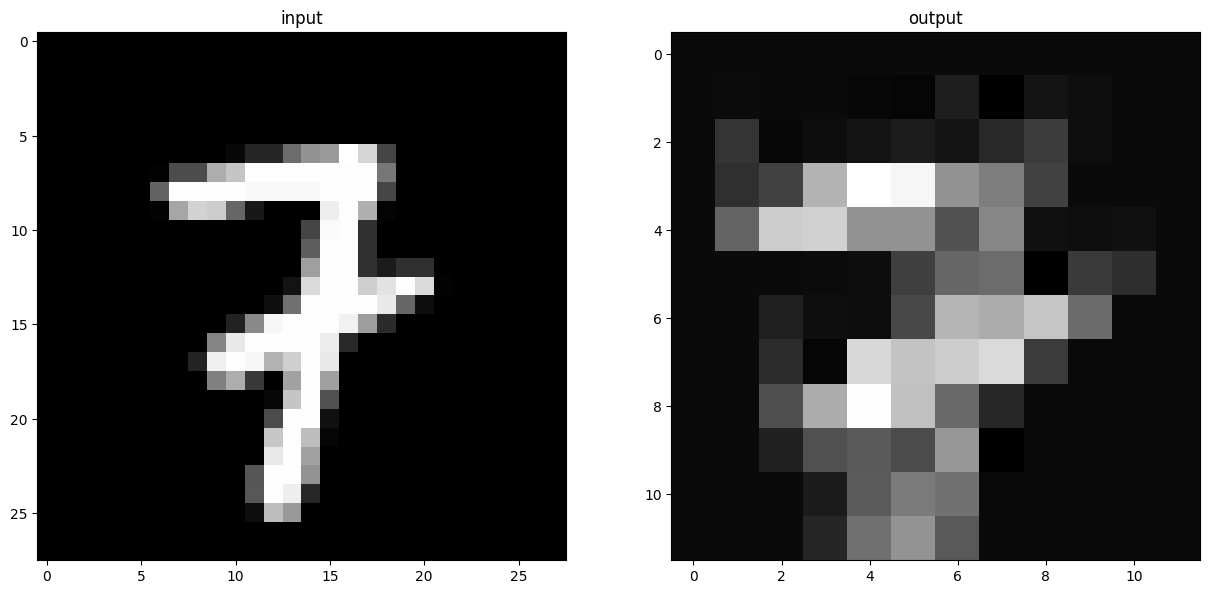

In [127]:
plt.figure(figsize=(15,30))

# input
plt.subplot(121)
plt.title('input')
plt.imshow(images[0,0,:,:], 'gray') # 1번쨰 데이터

# maxpool(2,2) 적용이후
plt.subplot(122)
plt.title('output')
plt.imshow(pool_arr[0,0,:,:], 'gray') # 1번째 데이터에 maxpool-filter를 적용했을 때, 데이터가 어떻게 되는지; 해상도가 줄어들었다.
plt.show()

##### 선형 레이어(Linear layers)

1d만 가능하므로 `.view()`를 통해 1d로 펼쳐줘야함

In [128]:
input_image.shape

torch.Size([28, 28])

In [129]:
# view() : flatten(그냥 펴준다.)

flatten = input_image.view(1, 28 * 28) # 데이터를 펴준다.
flatten.shape

torch.Size([1, 784])

In [130]:
# Linear() : 최종적으로 원하는 사이즈로 만들어준다.

lin = nn.Linear(784, 10)(flatten) # in-features = 784, out-features = 10; 784 -> 10
lin.shape

torch.Size([1, 10])

In [131]:
# 우리가 흔히 아는 MLP에서의 층간의 가중치와 관련

x = nn.Linear(784, 10)
x.weight.shape

torch.Size([10, 784])

In [132]:
# weight의 경우, detach를 해주어야 numpy로 변환이 가능하다.

# lin.numpy()
lin.detach().numpy() # 10개의 값

array([[-0.08577629, -0.5531304 , -0.07707965, -0.6047635 ,  0.07135873,
         0.40985775,  0.10619414,  0.71384436,  0.34136456, -0.46736223]],
      dtype=float32)

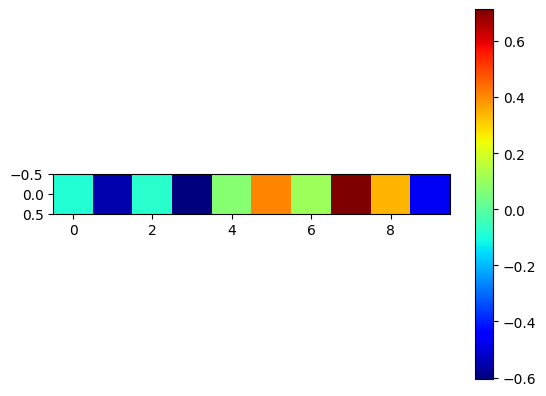

In [133]:
plt.imshow(lin.detach().numpy(), 'jet') # 10개의 linear-node값
plt.colorbar()
plt.show()

##### 비선형 활성화 (Non-linear Activations)

`F.softmax`와 같은 활성화 함수 등

In [134]:
flatten = images[0,0,:,:].view(1, 28 * 28) # flatten 진행
lin = nn.Linear(784, 10)(flatten) # 784 -> 10 으로 원하는 사이즈로 변경
softmax = F.softmax(lin, dim=1) # 최종 결과에 활성화함수 적용

softmax # grad_fn=<SoftmaxBackward0> 이 추가로 나타남; 마지막 연산은 softmax

tensor([[0.0781, 0.0554, 0.0679, 0.1433, 0.1319, 0.0947, 0.1246, 0.1212, 0.0971,
         0.0858]], grad_fn=<SoftmaxBackward0>)

In [135]:
# np.sum(softmax.numpy(), axis=0)

In [136]:
np.sum(softmax.detach().numpy(), axis=1)

array([1.], dtype=float32)

In [137]:
with torch.no_grad(): # 이 안에서는 기울기 계산을 따로 하지 않는다.; 이렇게 해야 나중에 detach() 등을 할 필요가 없다.
    flatten = images[0,0,:,:].view(1, 28 * 28) # flatten 진행
    lin = nn.Linear(784, 10)(flatten) # 784 -> 10 으로 원하는 사이즈로 변경

    softmax = F.softmax(lin, dim=1) # 최종 결과에 활성화함수 적용
# dim=1 : 하나의 행 안에서 열이 각각의 값으로 생각하여, 합이 1이 되도록 prob형태로 만든다.
# 즉, 각 행별로 나눈다음, 열끼리 비교하여 합이 1이 되도록 softmax함수를 적용한다.

softmax

tensor([[0.1090, 0.1383, 0.1217, 0.0832, 0.0770, 0.1162, 0.0806, 0.0855, 0.1123,
         0.0763]])

In [138]:
with torch.no_grad():
    softmax = F.softmax(lin, dim=0) # 최종 결과에 활성화함수 적용
# dim=0 : 각 열별로 나눈다음, 행끼리 비교하여 합이 1이 되도록 softmax함수를 적용한다.

softmax

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [139]:
np.sum(softmax.numpy(), axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)

`F.relu`

- ReLU 함수를 적용하는 레이어
- `nn.ReLU`로도 사용 가능

In [140]:
# remark
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# .to(device) : 본래 cpu에 저장된 tensor변수를 gpu에 저장한다.

inputs = torch.randn(4, 3, 28, 28).to(device)
inputs.shape

torch.Size([4, 3, 28, 28])

In [141]:
# # layer 선언
# layer = nn.Conv2d(3, 20, 5, 1)

# # output 선언; input을 layer에 통과시켜 만든다.
# output = F.relu(layer(inputs))
# output.shape

In [142]:
# layer 선언
layer = nn.Conv2d(3, 20, 5, 1).to(device) # input이 gpu에 저장되면, layer인 weight도 gpu에 저장해주어야한다.

# output 선언; input을 layer에 통과시켜 만든다.
output = F.relu(layer(inputs))
output.shape

torch.Size([4, 20, 24, 24])

#### 신경망 종류

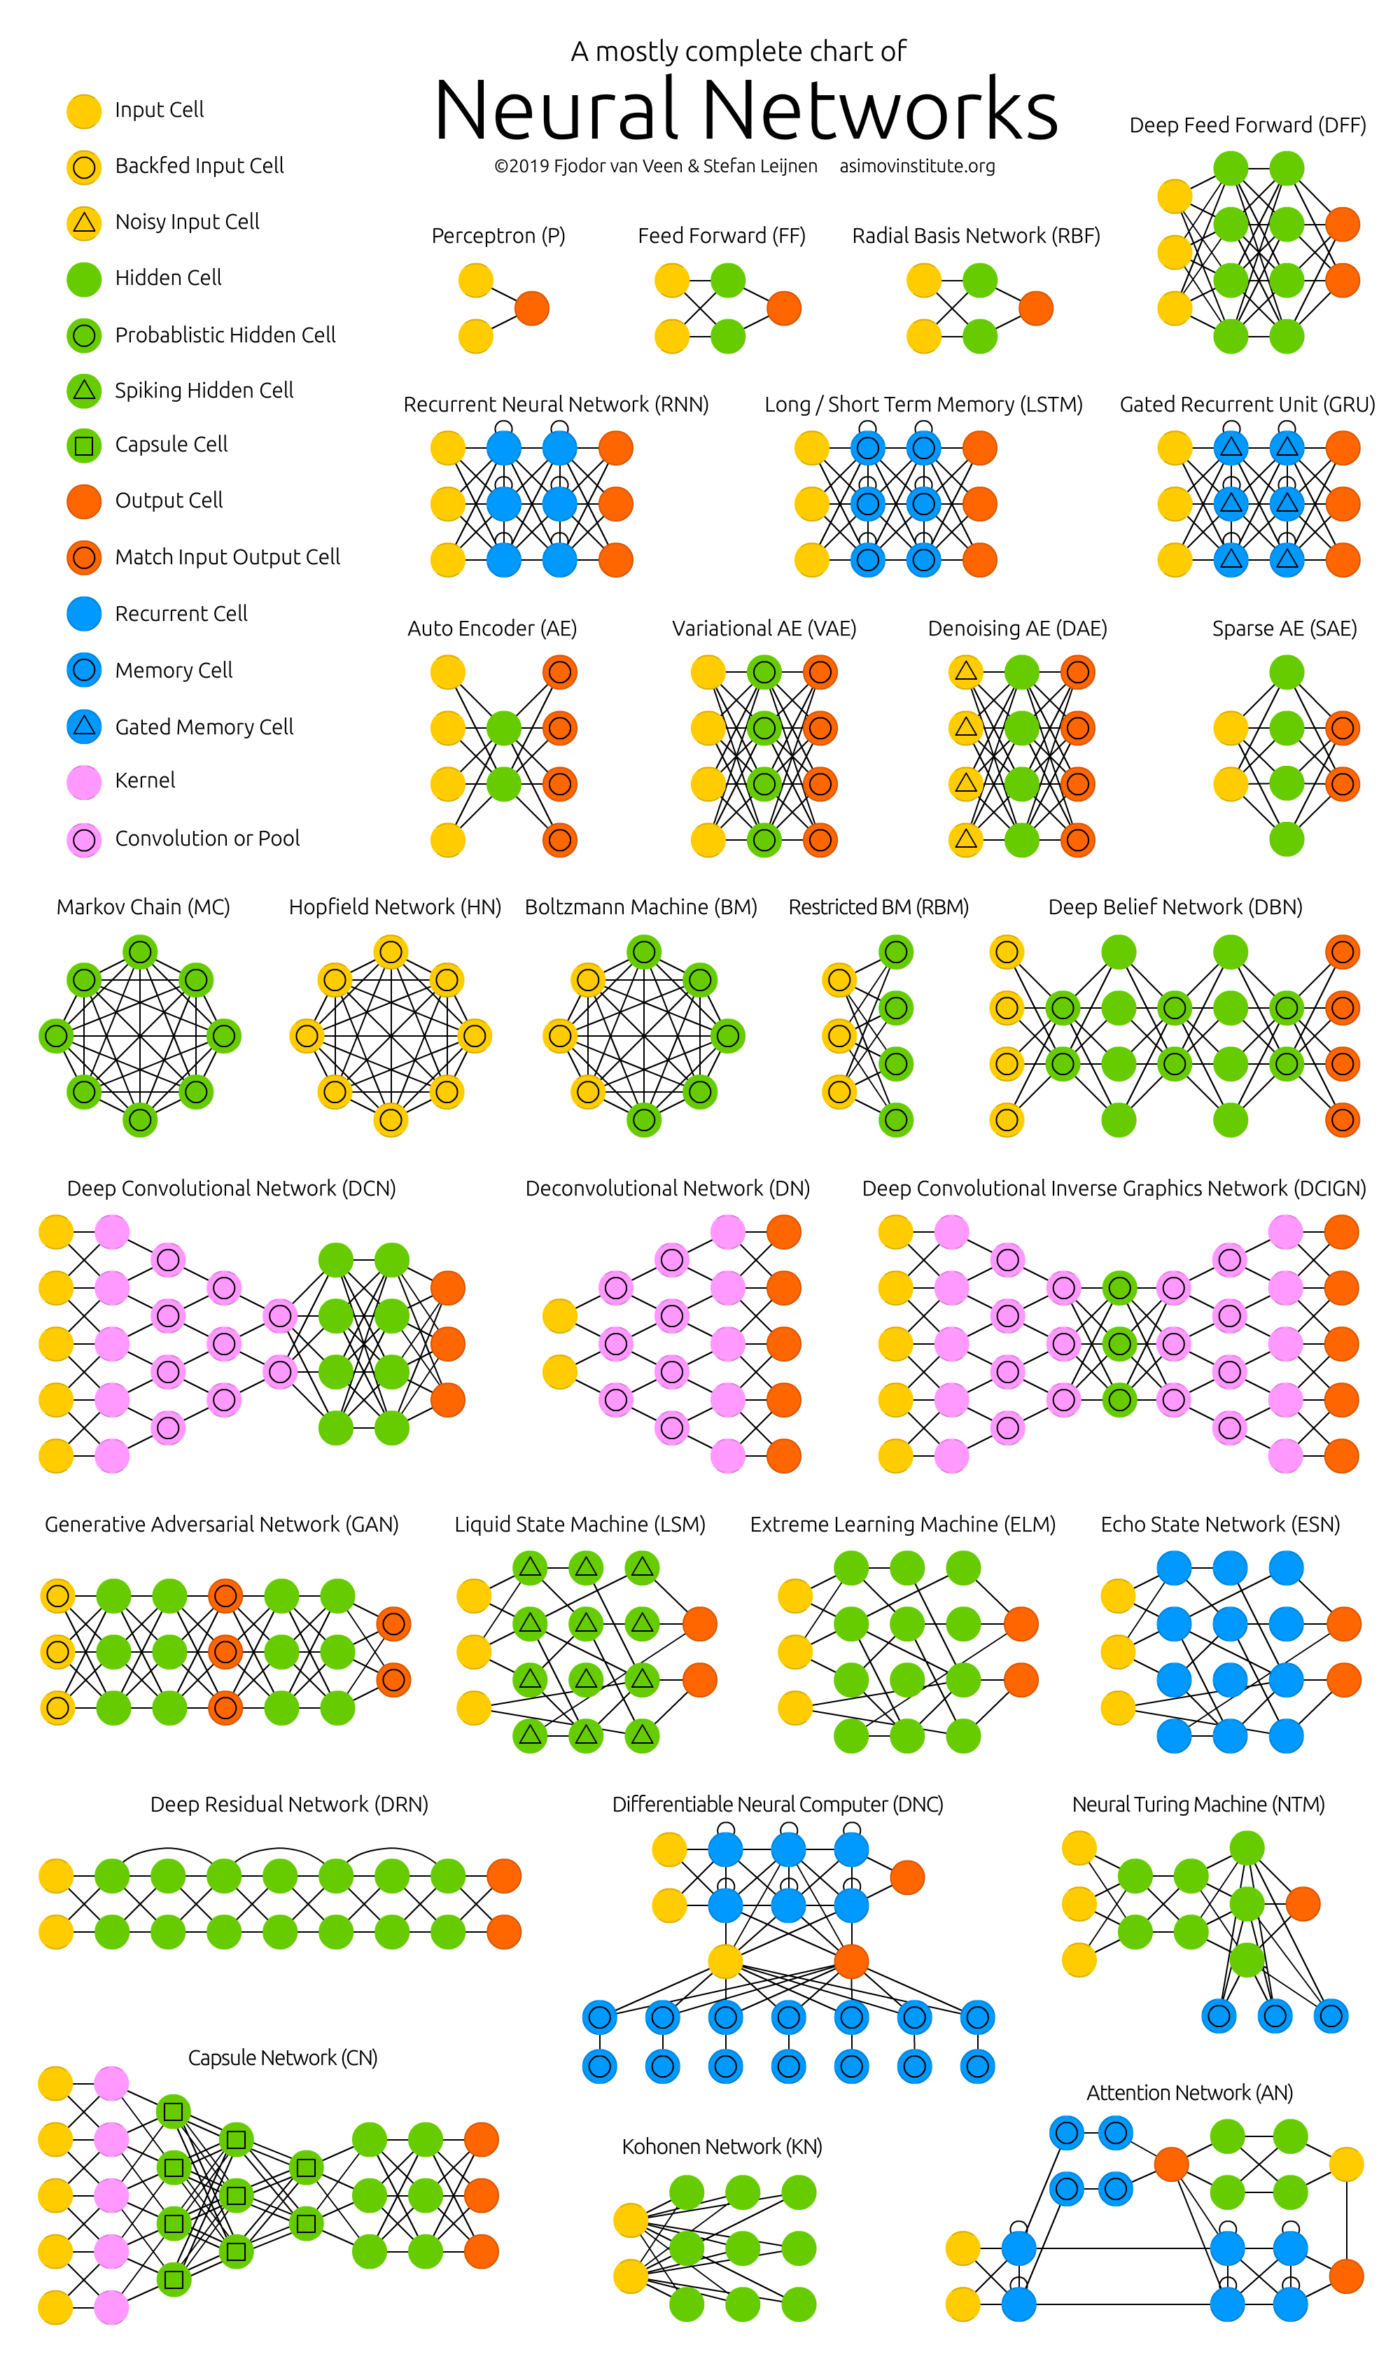

#### 모델 정의


##### `nn.Module` 상속 클래스 정의
- `nn.Module`을 상속받는 클래스 정의
- `__init__()`: 모델에서 사용될 모듈과 활성화 함수 등을 정의
- `forward()`: 모델에서 실행되어야 하는 연산을 정의

In [143]:
class a():
    def __init__(self, inputs):
        self.inputs = inputs

type(a) # type -> class

type

In [144]:
type(nn.Module) # class

type

In [145]:
type(F)

module

In [146]:
class Model(nn.Module): # nn에 있는 Module라는 클래스를 상속한 클래스를 만든다.

    # Model이라는 class에서 사용할 변수 선언
    def __init__(self, inputs): # inputs = 투입되는 변수

        super(Model, self).__init__()
        # 부모 클래스의 __init__() 매직 메소드를 자식 클래스의 __init__() 매직 메소드에서 실행 한다.
        # 즉, 부모 클래스인 nn.Module에서 정의된 변수를 자식 클래스인 Model에서 사용하고 싶을 때, 이용한다.
        # 참고자료 : https://supermemi.tistory.com/entry/Python-3-%ED%8C%8C%EC%9D%B4%EC%8D%AC-%ED%81%B4%EB%9E%98%EC%8A%A4%EC%9D%98-super-%EC%97%90-%EB%8C%80%ED%95%B4-%EC%A0%9C%EB%8C%80%EB%A1%9C-%EC%95%8C%EC%95%84%EB%B3%B4%EC%9E%90-superinit-super%EC%9D%98-%EC%9C%84%EC%B9%98
        # 참고. vs 매서드 오버라이딩
        # 매서드 오바라이딩이란? 부모 클래스에서 사용하는 함수/매서드 중 일부를 변경해서 사용한다.
        # 참고자료 : https://junior-datalist.tistory.com/96

        self.layer = nn.Linear(inputs, 1) # layer변수를 inputs -> 1 로 바꾸는 Linear로 정의
        self.activation = nn.Sigmoid() # activation변수를 Sigmoid라는 활성화함수로 정의


    # 위에서 정의한 변수들을 가지고, 직접 NN 구조를 만들어보자.
    def forward(self, x): # x : input-data

        x = self.layer(x) # 먼저, input-data를 layer변수로 정의된 'Linear()' layer를 통과시켜 inputs -> 1 사이즈로 만든다.
        x = self.activation(x) # 계속해서, 1로 사이즈를 줄인 데이터에 activation변수로 정의된 'Sigmoid()' 활성화함수를 이용해 최종적으로 값을 낸다.

        return x

In [147]:
model = Model(1) # inputs가 1인 Model class를 model변수로 정의한다.
print(list(model.children()), '\n\n') # 만든 model의 구조를 살펴본다. nn.Module에 있는 함수/매서드 'children()'

print(list(model.modules()), '\n\n') # 위의 children() 보다 더 많은 정보를 제공
print(list(model.modules())[0], '\n')
print(list(model.modules())[1], '\n') # children() 과 같다.

[Linear(in_features=1, out_features=1, bias=True), Sigmoid()] 


[Model(
  (layer): Linear(in_features=1, out_features=1, bias=True)
  (activation): Sigmoid()
), Linear(in_features=1, out_features=1, bias=True), Sigmoid()] 


Model(
  (layer): Linear(in_features=1, out_features=1, bias=True)
  (activation): Sigmoid()
) 

Linear(in_features=1, out_features=1, bias=True) 



##### `nn.Sequential`을 이용한 신경망 정의
- `nn.Sequential` 객체로 그 안에 각 모듈을 순차적으로 실행
- `__init__()`에서 사용할 네트워크 모델들을 `nn.Sequential`로 정의 가능
- `forward()`에서 실행되어야 할 계산을 가독성 높게 작성 가능

remark) 모듈 = layer가 2개 이상 있을 때, 즉, nn.Sequential은 2개 이상의 layer나 activation-function을 묶어서 정의할 때, 사용한다.

In [148]:
class Model(nn.Module):

    # 사용할 변수 선언
    def __init__(self):
        super(Model, self).__init__()
        # 여기까지는 동일하다.


        # layer를 하나하나 정의하지 않고, 묶어서 정의한다.

        # 1번째 layer의 집합인 모듈을 layer변수라는 변수로 저장
        self.layer1 = nn.Sequential( # layer라는 변수를 Sequential()라는 걸 통해 정의
            # 3 -> 64, filter-size = 5x5
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5), # 1번쨰 layer
            nn.ReLU(inplace=True), # 2번째 활성화함수
            # F.relu와 동일
            nn.MaxPool2d(2) # 3번쨰 max-pooling
        )

        # 2번째 layer의 집합인 모듈을 layer변수라는 변수로 저장
        self.layer2 = nn.Sequential(
            # 64 -> 30, filter-size = 5x5
            nn.Conv2d(in_channels=64, out_channels=30, kernel_size=5), # 1번쨰 layer
            nn.ReLU(inplace=True), # 2번째 활성화함수
            nn.MaxPool2d(2) # 3번쨰 max-pooling
        )

        # 3번째 layer의 집합인 모듈을 layer변수라는 변수로 저장
        self.layer3 = nn.Sequential(
            # 여기서 주의할 점은 30x5x5 짜리 matrix를 어떻게 1x1x(30*5*5)짜리 matrix로 바꿀 수 있냐인데,
            # 이후의 forward() 과정에서 view(1, 30*5*5)를 통해 flatten을 해준다.
            # 30*5*5 -> 10
            nn.Linear(in_features=30*5*5, out_features=10, bias=True),
            nn.ReLU(inplace=True)
        )

    # 선언한 변수들을 가지고 NN 구조 형성
    def forward(self, x):
        #
        x = self.layer1(x) # Sequential()로 만든 layer1이라는 layer집합들 적용
        x = self.layer2(x) # Sequential()로 만든 layer2이라는 layer집합들 적용
        x = x.view(x.shape[0], -1) # Linear적용전에 flatten을 해준다.
        x = self.layer3(x) # Sequential()로 만든 layer2이라는 layer집합들 적용
        return x

In [149]:
# nn에서 ReLU()() 가져오기

nn.ReLU()(torch.tensor(1))

tensor(1)

In [150]:
# nn.functional에서 relu() 가져오기
import torch.nn.functional as F

F.relu(torch.tensor(1))

tensor(1)

In [151]:
model = Model()

print(list(model.children()), '\n\n')
print('-'*100)
print(list(model.modules()), '\n')

[Sequential(
  (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Linear(in_features=750, out_features=10, bias=True)
  (1): ReLU(inplace=True)
)] 


----------------------------------------------------------------------------------------------------
[Model(
  (layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0)

##### 파이토치 사전학습 모델

* https://pytorch.org/vision/stable/models.html

#### 모델 파라미터


##### 손실 함수(Loss function)

* 예측 값과 실제 값 사이의 오차 측정
* 학습이 진행되면서 해당 과정이 얼마나 잘 되고 있는지 나타내는 지표
* 모델이 훈련되는 동안 최소화될 값으로 주어진 문제에 대한 성공 지표
* 손실 함수에 따른 결과를 통해 학습 파라미터를 조정
* 최적화 이론에서 최소화 하고자 하는 함수
* 미분 가능한 함수 사용
* 파이토치의 주요 손실 함수
  - `torch.nn.BCELoss`: 이진 분류를 위해 사용
  - `torch.nn.CrossEntropyLoss`: 다중 클래스 분류를 위해 사용
  - `torch.nn.MSELoss`: 회귀 모델에서 사용

In [152]:
criterion = nn.MSELoss()
criterion = nn.CrossEntropyLoss()
criterion = nn.MSELoss()

##### 옵티마이저(Optimizer)

* 손실 함수를 기반으로 모델이 어떻게 업데이트되어야 하는지 결정 (특정 종류의 확률적 경사 하강법 구현)
* optimizer는 `step()`을 통해 전달받은 파라미터를 모델 업데이트
* 모든 옵티마이저의 기본으로 `torch.optim.Optimizer(params, defaults)` 클래스 사용
* `zero_grad()`를 이용해 옵티마이저에 사용된 파라미터들의 기울기를 0으로 설정
* `torch.optim.lr_scheduler`를 이용해 에포크(epochs)에 따라 학습률(learning rate) 조절
* 파이토치의 주요 옵티마이저: `optim.Adadelta`, `optim.Adagrad`, `optim.Adam`, `optim.RMSprop`, `optim.SGD`

In [153]:
import torch.optim as optim

optimizer = optim.SGD(model.parameters(), lr=0.001)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

<img src="https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory2&fname=http%3A%2F%2Fcfile25.uf.tistory.com%2Fimage%2F222B4F4F562BD0330EA41C">

##### 학습률 스케줄러(Learning rate scheduler)

* 학습시 특정 조건에 따라 학습률을 조정하여 최적화 진행
* 일정 횟수 이상이 되면 학습률을 감소(decay)시키거나 전역 최소점(global minimum) 근처에 가면 학습률을 줄이는 등
* 파이토치의 학습률 스케줄러 종류
  - `optim.lr_scheduler.LambdaLR`: 람다(lambda) 함수를 이용해 그 결과를 학습률로 설정
  - `optim.lr_scheduler.StepLR`: 단계(step)마다 학습률을 감마(gamma) 비율만큼 감소
  - `optim.lr_scheduler.MultiStepLR`: `StepLR`과 비슷하지만 특정 단계가 아니라 지정된 에포크에만 감마 비율로 감소
  - `optim.lr_scheduler.ExponentialLR`: 에포크마다 이전 학습률에 감마만큼 곱함
  - `optim.lr_scheduler.CosineAnnealingLR`: 학습률을 코사인(cosine) 함수의 형태처럼 변화시켜 학습률일 커지기도 하고 작아지기도 함
  - `optim.lr_scheduler.ReduceLROnPlateau`: 학습이 잘되는지 아닌지에 따라 동적으로 학습률 변화

##### 지표(Metrics)

* 모델의 학습과 테스트 단계를 모니터링

In [154]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 761.3/761.3 kB 9.3 MB/s eta 0:00:00


In [155]:
# 분류문제

# 계산된 output(y_pred; y_pred)와 실제 output(y_label; target) 정의

preds = torch.randn(10,5) # 10개의 데이터, 5개의 class
print(preds, '\n')

preds = torch.randn(10,5).softmax(dim=-1) # 마지막 차원기준
print(preds, '\n') # 즉, 행을 기준으로 행마다 쪼개, 각 행안에서의 열의 prob 합이 1이된다.

sum = np.sum(preds.detach().numpy(), axis=1)
print(sum, '\n')

y_pred = np.argmax(preds.detach().numpy(), axis=1)
print(y_pred, '\n')

target = torch.randint(5, (10,)) # 10짜리 matrix를 랜덤으로 생성
print(target, '\n')

print('acc :', len(np.where(y_pred == target.detach().numpy())[0]) / 10)

tensor([[-0.2317,  1.1350,  0.3070, -0.7334, -1.5986],
        [-0.2485,  0.7456,  0.6513, -1.0874, -0.7836],
        [-0.8549,  0.8457, -0.4042,  1.7245, -1.0619],
        [ 0.2862,  0.0512, -0.1969, -0.6604, -1.3134],
        [-0.1418,  0.4681, -0.5011, -1.4574,  0.6207],
        [-2.0375, -2.7515,  0.2679, -0.4882, -0.3702],
        [ 1.0579,  1.8614,  1.0134,  0.9320, -0.2714],
        [ 0.5829,  0.1703,  0.3968,  1.5696, -0.5806],
        [ 0.7435, -0.7980, -0.7440, -1.6374,  1.2307],
        [ 1.9008,  0.6829,  1.4970,  1.8848,  1.8716]]) 

tensor([[0.0739, 0.1058, 0.3627, 0.3922, 0.0654],
        [0.0388, 0.3930, 0.1199, 0.1608, 0.2874],
        [0.2603, 0.1175, 0.4928, 0.0600, 0.0694],
        [0.0681, 0.1623, 0.3721, 0.3278, 0.0698],
        [0.1444, 0.1759, 0.1410, 0.3869, 0.1518],
        [0.1332, 0.1304, 0.3402, 0.0406, 0.3556],
        [0.2486, 0.0073, 0.4841, 0.1989, 0.0612],
        [0.1227, 0.1362, 0.0758, 0.6523, 0.0130],
        [0.2338, 0.4134, 0.0322, 0.1706, 0.1500

In [156]:
# 평가함수

import torchmetrics

torchmetrics.functional.accuracy(preds, target, task="multiclass", num_classes=5)

tensor(0.3000)

multi-class vs multi-label
* https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=sw4r&logNo=221714823560

In [157]:
metric = torchmetrics.Accuracy(task="multiclass", num_classes=5)
# 이렇게 해서 accuracy 함수를 따로 가져올수도 있다.

n_batches = 10 # 10번 정도 이러한 행위를 반복

for i in range(n_batches):

    preds = torch.randn(10, 5).softmax(dim=-1)
    target = torch.randint(5, (10, ))

    acc = metric(preds, target)
    print(acc)

acc = metric.compute()
print(acc)

tensor(0.4000)
tensor(0.2000)
tensor(0.)
tensor(0.2000)
tensor(0.4000)
tensor(0.1000)
tensor(0.2000)
tensor(0.1000)
tensor(0.3000)
tensor(0.1000)
tensor(0.2000)


### CNN 모델구현 1
* Regression Model

#### 선형 회귀 모델(Linear Regression Model)

##### 데이터 생성

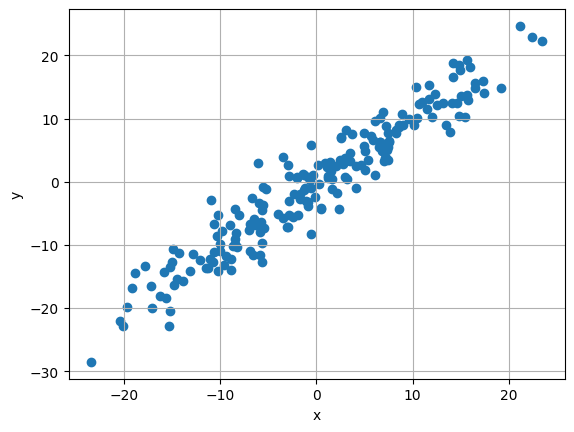

In [158]:
X  = torch.randn(200, 1) * 10
y = X + 3 * torch.randn(200, 1) # y = x + 3
plt.scatter(X.numpy(), y.numpy())
plt.ylabel('y')
plt.xlabel('x')
plt.grid()
plt.show()

##### 모델 정의 및 파라미터

In [159]:
class LRModel(nn.Module):

    # 클래스 내에서 사용할 변수선언
    def __init__(self):
        super(LRModel, self).__init__()
        self.linear = nn.Linear(1,1) # 1 -> 1; x값 1개로, y값 1개를 유추하는 문제이다.

    # nn 구조 형성
    def forward(self, x):
        pred = self.linear(x)
        return pred

In [160]:
model = LRModel()
print(model, '\n')
print(list(model.parameters()))

LRModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
) 

[Parameter containing:
tensor([[0.1797]], requires_grad=True), Parameter containing:
tensor([0.0326], requires_grad=True)]


In [161]:
w, b = model.parameters()

# w
print(w, '\n')
print(w[0], '\n')
print(w[0][0], '\n')
print(w[0][0].item(), '\n') # 2개의 대괄호로 둘러쌓여 있다.
print('-'*50)

# b
print(b, '\n')
print(b[0], '\n')
print(b[0].item(), '\n') # 1개의 대괄호로 둘러쌓여 있다.

Parameter containing:
tensor([[0.1797]], requires_grad=True) 

tensor([0.1797], grad_fn=<SelectBackward0>) 

tensor(0.1797, grad_fn=<SelectBackward0>) 

0.17973577976226807 

--------------------------------------------------
Parameter containing:
tensor([0.0326], requires_grad=True) 

tensor(0.0326, grad_fn=<SelectBackward0>) 

0.032587289810180664 



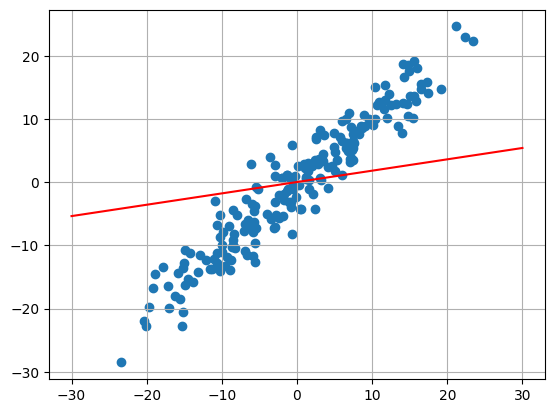

In [162]:
w, b = model.parameters()

w1, b1 = w[0][0].item(), b[0].item() # 그냥 들어있는 초기값
x1 = np.array([-30,30])
y1 = w1 * x1 + b1

plt.plot(x1,y1, 'r')
plt.scatter(X,y)
plt.grid()
plt.show()

##### 손실 함수 및 옵티마이저

In [163]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [164]:
list(model.parameters())

[Parameter containing:
 tensor([[0.1797]], requires_grad=True),
 Parameter containing:
 tensor([0.0326], requires_grad=True)]

#### 모델 학습

##### 전체 과정

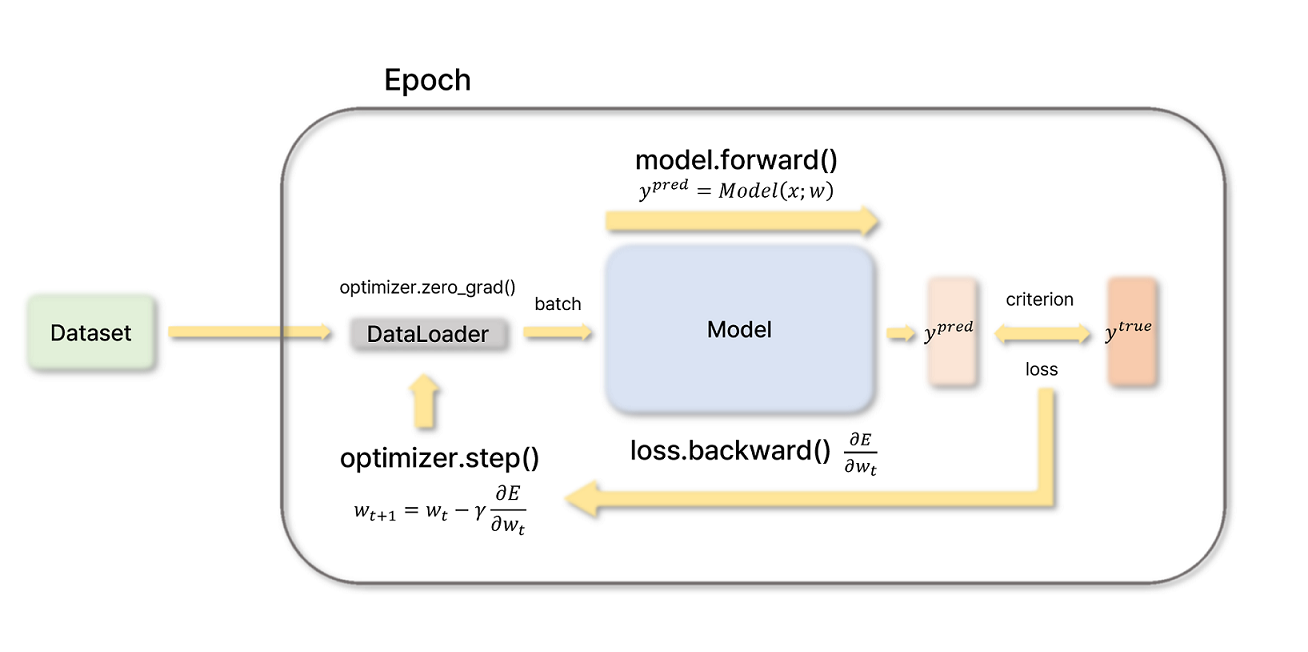

##### 전체적인 변수 확인

In [165]:
epochs = 3 # epochs : 1번의 epochs당 데이터 전체를 통해 학습을 한 것이다.
# mini-batch Gradient Descent에서 모든 미니 배치가 가중치 학습에 한 번씩 사용되면 '1-epoch'가 진행되었다고 한다.

loss_list = [] # loss 변화 저장 장소
loss_list1 = []

for epoch in range(epochs):
    optimizer.zero_grad() # 각 epochs마다 optimizer에서 처음 gradient를 0으로 초기화

    y_pred = model(X) # model에 넣어 예측
    # list(model.children()) -> [Linear(in_features=1, out_features=1, bias=True)]

    loss = criterion(y_pred, y) # MSE로 손실함수 계산
    loss_list.append(loss.item()) # tensor -> list
    loss_list1.append(loss)

    loss.backward() # gradient 계산

    optimizer.step() # weight-update

In [166]:
list(model.children())

[Linear(in_features=1, out_features=1, bias=True)]

In [167]:
X.shape

torch.Size([200, 1])

In [168]:
model(X).shape

torch.Size([200, 1])

In [169]:
loss_list # list

[74.44172668457031, 51.247825622558594, 36.288665771484375]

In [170]:
loss_list1 # tensor; grad_fn=MSE -> 마지막 연산 = MSE 평가함수

[tensor(74.4417, grad_fn=<MseLossBackward0>),
 tensor(51.2478, grad_fn=<MseLossBackward0>),
 tensor(36.2887, grad_fn=<MseLossBackward0>)]

##### 어떤 값을 관찰해야할까?
* train-parameter / weights

In [171]:
# loss, y_pred, y

epochs = 3

loss_list = []

for epoch in range(epochs):

    optimizer.zero_grad() # 각 epochs마다 optimizer에서 처음 gradient를 0으로 초기화

    y_pred = model(X)

    loss = criterion(y_pred, y)
    loss_list.append(loss)
    loss.backward()

    # 처음 시작된 변수가 아니므로, .grad에는 None이 저장됨
    print(loss.grad, loss.grad_fn) # MSE
    print(y_pred.grad, y_pred.grad_fn) # Add
    print(y.grad, y.grad_fn, '\n') # None

    optimizer.step()

None <MseLossBackward0 object at 0x7bf300cb43a0>
None <AddmmBackward0 object at 0x7bf2fb71aaa0>
None None 

None <MseLossBackward0 object at 0x7bf3045a6950>
None <AddmmBackward0 object at 0x7bf3045a6950>
None None 

None <MseLossBackward0 object at 0x7bf3045a5660>
None <AddmmBackward0 object at 0x7bf3045a5660>
None None 



<ipython-input-171-f3d4227b10fc>:18: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:486.)
  print(loss.grad, loss.grad_fn) # MSE
<ipython-input-171-f3d4227b10fc>:19: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pyto

In [172]:
list(model.parameters())

# remark
# w, b = model.parameters()

[Parameter containing:
 tensor([[0.7758]], requires_grad=True),
 Parameter containing:
 tensor([0.0293], requires_grad=True)]

In [173]:
# w, b, w[0][0], b[0]

epochs = 3

loss_list = []

for epoch in range(epochs):

    optimizer.zero_grad() # 각 epochs마다 optimizer에서 처음 gradient를 0으로 초기화

    y_pred = model(X)

    loss = criterion(y_pred, y)
    loss_list.append(loss)
    loss.backward()

    # 가중치(weights)이자 parameter값인 w와 b가 gradient로 계산된다.
    # 참고로, indexing을 하면 이것도 계산으로 들어간다.
    print('w :', w, w.grad, w.grad_fn)
    print('b :', b, b.grad, b.grad_fn, '\n')
    print('w :', w[0][0], w[0][0].grad, w[0][0].grad_fn)
    print('b :', b[0], b[0].grad, b[0].grad_fn)
    print('-'*50, '\n')

    optimizer.step()

w : Parameter containing:
tensor([[0.7758]], requires_grad=True) tensor([[-43.0312]]) None
b : Parameter containing:
tensor([0.0293], requires_grad=True) tensor([0.5922]) None 

w : tensor(0.7758, grad_fn=<SelectBackward0>) None <SelectBackward0 object at 0x7bf3efff97e0>
b : tensor(0.0293, grad_fn=<SelectBackward0>) None <SelectBackward0 object at 0x7bf3000c6aa0>
-------------------------------------------------- 

w : Parameter containing:
tensor([[0.8188]], requires_grad=True) tensor([[-34.5581]]) None
b : Parameter containing:
tensor([0.0287], requires_grad=True) tensor([0.5986]) None 

w : tensor(0.8188, grad_fn=<SelectBackward0>) None <SelectBackward0 object at 0x7bf304036e60>
b : tensor(0.0287, grad_fn=<SelectBackward0>) None <SelectBackward0 object at 0x7bf304036e60>
-------------------------------------------------- 

w : Parameter containing:
tensor([[0.8534]], requires_grad=True) tensor([[-27.7534]]) None
b : Parameter containing:
tensor([0.0281], requires_grad=True) tensor([

<ipython-input-173-0744dfce79f2>:21: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:486.)
  print('w :', w[0][0], w[0][0].grad, w[0][0].grad_fn)
<ipython-input-173-0744dfce79f2>:22: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.

때에 따라 값의 변화가 작다면, 모델이 계속 누적되어 학습되기 때문이므로 위의 모델 재정의 후에 다시 학습해야한다.

##### 1. optimizer.zero_grad()
* 각 epochs마다 optimizer에서 처음 gradient를 0으로 초기화


In [174]:
# 매 epoch 마다 'optimizer'의 gradient를 초기화해주었을 때

epochs = 10

w_grad_list = []
b_grad_list = []

for epoch in range(epochs):

    optimizer.zero_grad() # 각 epochs마다 optimizer에서 처음 gradient를 0으로 초기화

    y_pred = model(X)

    loss = criterion(y_pred, y)
    loss_list.append(loss)
    loss.backward()

    w_grad_list.append(w.grad.item())
    b_grad_list.append(b.grad.item())

    optimizer.step()

In [175]:
# 매 epoch 마다 'optimizer'의 gradient를 초기화해주지 않을 때,
# 이전 epoch의 gradient값이 다음 epoch의 gradient에 누적되어 들어간다.

epochs = 10

w_grad_list_no_zero = []
b_grad_list_no_zero = []

for epoch in range(epochs):

    # optimizer.zero_grad() # 각 epochs마다 optimizer에서 처음 gradient를 0으로 초기화

    y_pred = model(X)

    loss = criterion(y_pred, y)
    loss_list.append(loss)
    loss.backward()

    w_grad_list_no_zero.append(w.grad.item())
    b_grad_list_no_zero.append(b.grad.item())

    optimizer.step()

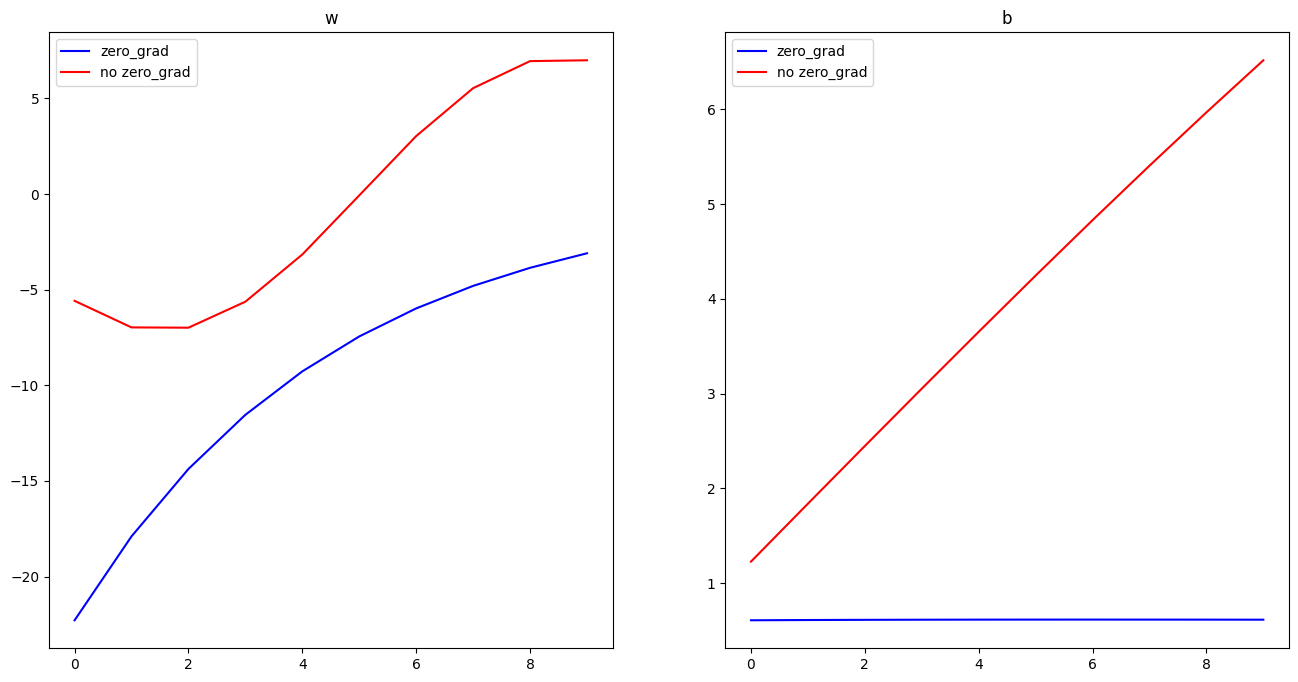

In [176]:
plt.figure(figsize=(16, 8))

# w
plt.subplot(1,2,1)
plt.plot(range(len(w_grad_list)), w_grad_list, color='blue', label='zero_grad')
plt.plot(range(len(w_grad_list_no_zero)), w_grad_list_no_zero, color='red', label='no zero_grad')
plt.legend()
plt.title('w')

# b
plt.subplot(1,2,2)
plt.plot(range(len(b_grad_list)), b_grad_list, color='blue', label='zero_grad')
plt.plot(range(len(b_grad_list_no_zero)), b_grad_list_no_zero, color='red', label='no zero_grad')
plt.legend()
plt.title('b')

plt.show()

# gradient를 매 epochs마다 0으로 만들지 않으면, 이전 gradient가 누적되어 이상하게 된다.
# 아래 결과도 no zero_grad의 크기가 엄청 크게 나온다.

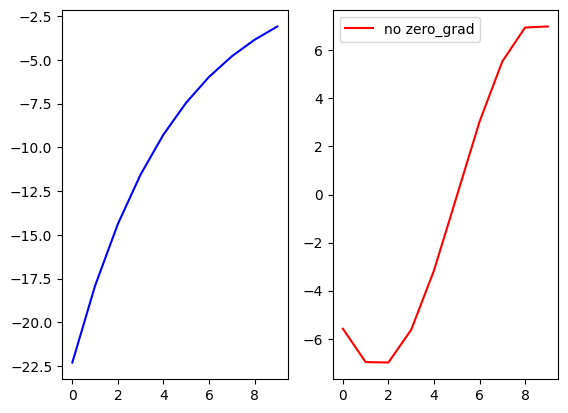

In [177]:
# w

plt.subplot(1,2,1)
plt.plot(range(len(w_grad_list)), w_grad_list, color='blue', label='zero_grad')
plt.subplot(1,2,2)
plt.plot(range(len(w_grad_list_no_zero)), w_grad_list_no_zero, color='red', label='no zero_grad')
plt.legend()
plt.show()

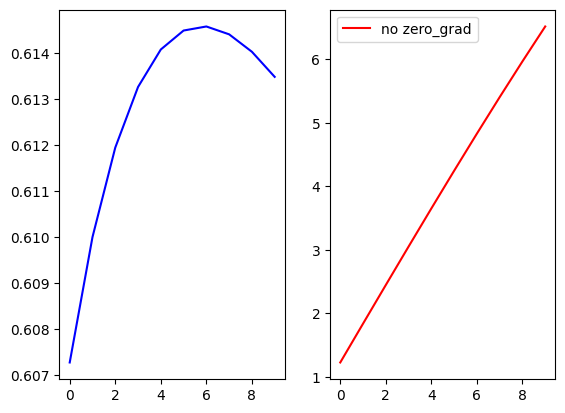

In [178]:
# b

plt.subplot(1,2,1)
plt.plot(range(len(b_grad_list)), b_grad_list, color='blue', label='zero_grad')
plt.subplot(1,2,2)
plt.plot(range(len(b_grad_list_no_zero)), b_grad_list_no_zero, color='red', label='no zero_grad')
plt.legend()
plt.show()

##### 2. optimizer.step()
* 해당 epoch안에서 미니배치들로 인한 weight변화를 parameters에 적용하여 parameters값을 update한다.

In [179]:
# optimizer.step() 사용; parameter의 update가 된다.

epochs = 10

# gradient 저장장소
w_grad_list = []
b_grad_list = []
# parameter 저장장소
w_list = []
b_list = []

for epoch in range(epochs):

    optimizer.zero_grad()

    y_pred = model(X)

    loss = criterion(y_pred, y)
    loss_list.append(loss)
    loss.backward()

    w_grad_list.append(w.grad.item())
    b_grad_list.append(b.grad.item())
    w_list.append(w.item())
    b_list.append(b.item())

    optimizer.step()

In [180]:
# optimizer.step() 사용 안함; parameter의 update가 되지 않는다.

epochs = 10

# gradient 저장장소
w_grad_list_no_opt_step = []
b_grad_list_no_opt_step = []
# parameter 저장장소
w_list_no_opt_step = []
b_list_no_opt_step = []

for epoch in range(epochs):

    optimizer.zero_grad()

    y_pred = model(X)

    loss = criterion(y_pred, y)
    loss_list.append(loss)
    loss.backward()

    w_grad_list_no_opt_step.append(w.grad.item())
    b_grad_list_no_opt_step.append(b.grad.item())
    w_list_no_opt_step.append(w.item())
    b_list_no_opt_step.append(b.item())

    # optimizer.step()

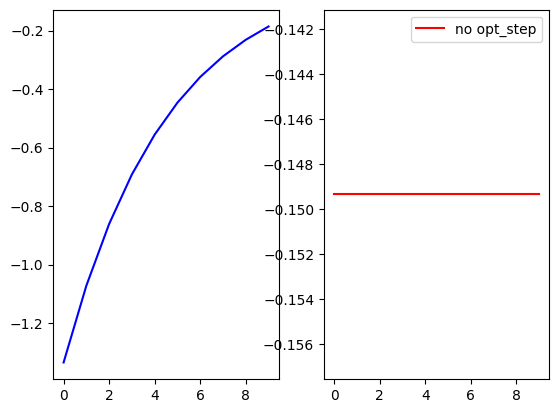

In [181]:
# w-gradient

plt.subplot(1,2,1)
plt.plot(range(len(w_grad_list)), w_grad_list, color='blue', label='opt_step')
plt.subplot(1,2,2)
plt.plot(range(len(w_grad_list_no_opt_step)), w_grad_list_no_opt_step, color='red', label='no opt_step')
plt.legend()
plt.show()

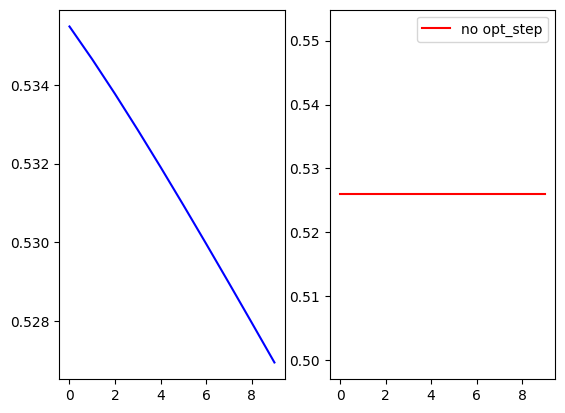

In [182]:
# b-gradient

plt.subplot(1,2,1)
plt.plot(range(len(b_grad_list)), b_grad_list, color='blue', label='opt_step')
plt.subplot(1,2,2)
plt.plot(range(len(b_grad_list_no_opt_step)), b_grad_list_no_opt_step, color='red', label='no opt_step')
plt.legend()
plt.show()

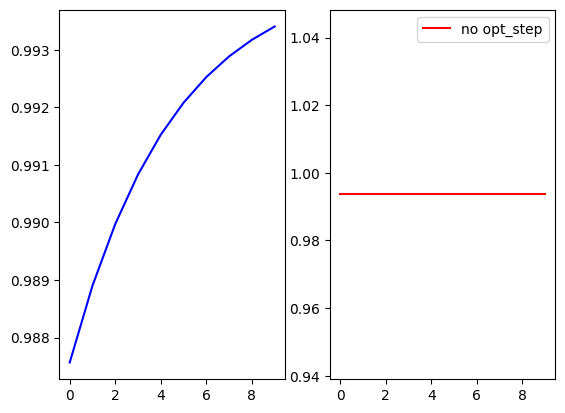

In [183]:
# w-value

plt.subplot(1,2,1)
plt.plot(range(len(w_list)), w_list, color='blue', label='opt_step')
plt.subplot(1,2,2)
plt.plot(range(len(w_list_no_opt_step)), w_list_no_opt_step, color='red', label='no opt_step')
plt.legend()
plt.show()

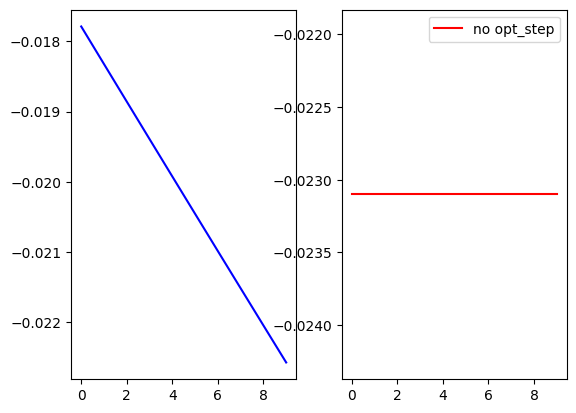

In [184]:
# b-value

plt.subplot(1,2,1)
plt.plot(range(len(b_list)), b_list, color='blue', label='opt_step')
plt.subplot(1,2,2)
plt.plot(range(len(b_list_no_opt_step)), b_list_no_opt_step, color='red', label='no opt_step')
plt.legend()
plt.show()

#### 최종결과

때에 따라 값의 변화가 작다면, 모델이 계속 누적되어 학습되기 때문이므로 위의 모델 재정의 후에 다시 학습해야한다.

In [185]:
epochs = 100
loss_list = []

for epoch in range(epochs):
    optimizer.zero_grad()

    y_pred = model(X)

    loss = criterion(y_pred, y)
    loss_list.append(loss.item())
    loss.backward()

    optimizer.step()

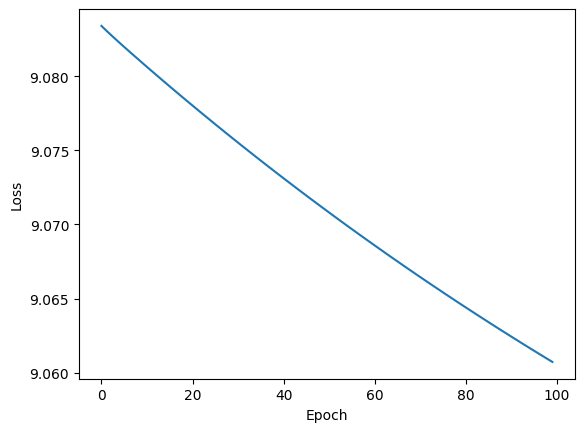

In [186]:
plt.plot(range(epochs), loss_list)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

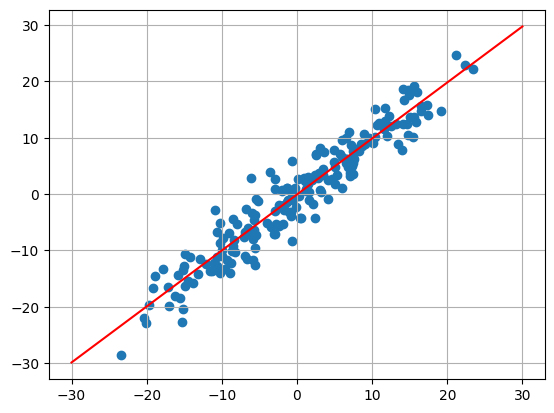

In [187]:
w1, b1 = w[0][0].item(), b[0].item() # 그냥 들어있는 초기값
x1 = np.array([-30,30])
y1 = w1 * x1 + b1

plt.plot(x1,y1, 'r')
plt.scatter(X,y)
plt.grid()
plt.show()

---
## Part2. ResNet50
- 아래부터는 이번 실습 세션에서 공부한 ResNet을 이용하는 문제입니다.
- 실습 세션 자료를 참고하여 모델을 구현해보세요.

### 1. 실습 세션에서 사용한 라이브러리를 import 하세요.

In [281]:
### Library importing

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import argparse
import numpy as np
import time
from copy import deepcopy # Add Deepcopy for args
import matplotlib.pyplot as plt
import argparse

### 2. 새로운 데이터셋을 불러오고, 실습세션에서처럼 데이터를 변형하세요.
- torchvision.dataset DOCS : https://pytorch.org/vision/main/datasets.html
- 기존 코드의 아래 부분을 변형하면 됩니다.
~~~
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [40000, 10000])
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
~~~

In [273]:
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [40000, 10000])
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=4)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=100, shuffle=False, num_workers=4)

partition = {'train': train_dataset, 'val':val_dataset, 'test':test_dataset}

Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


### 3. Bottleneck Block을 이용, ResNet50 모델을 완성하세요.

In [274]:
def conv3x3(in_planes, out_planes, stride=1):
    """3x3 convolution with padding"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=1, bias=False) # stride 1, padding 1이면 차원 유지.


def conv1x1(in_planes, out_planes, stride=1):
    """1x1 convolution without padding"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=1, stride=stride,
                     bias=False)

In [275]:
class Bottleneck(nn.Module):
    expansion = 4

    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(Bottleneck, self).__init__()
        self.conv1 = conv1x1(inplanes, planes)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = conv3x3(planes, planes, stride)
        self.bn2 = nn.BatchNorm2d(planes)
        self.conv3 = conv1x1(planes, planes * self.expansion)
        self.bn3 = nn.BatchNorm2d(planes * self.expansion)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        if self.downsample is not None:
          identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out

In [276]:
class ResNet(nn.Module):

    def __init__(self, block, layers, num_classes=1000, zero_init_residual=False):
        super(ResNet, self).__init__() # 상속

        self.inplanes = 64

        # input [3 * 224 * 224]
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3,
                               bias=False) # 1/2배
        # ouput = self.conv1(input) [64 * 112 * 112]

        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1) # 1/2 배
        # output [64 * 56 * 56]

        ## layer정의
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self._make_layer(block, 256, layers[2],  stride=2)
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2)

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)

        ## 가중치 초기화
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

        if zero_init_residual:
            for m in self.modules():
                    nn.init.constant_(m.bn3.weight, 0)

    # self.inplanes = 64

    def _make_layer(self, block, planes, blocks, stride=1):
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion: # 64 = 64 * 1
            downsample = nn.Sequential(
                conv1x1(self.inplanes, planes * block.expansion, stride),
                nn.BatchNorm2d(planes * block.expansion),
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes * block.expansion
        for _ in range(1, blocks):
            layers.append(block(self.inplanes, planes))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)

        return x

### 4. 불러온 데이터와 완성한 모델을 이용하여 모델 학습을 진행하세요.

In [277]:
def train(net, partition, optimizer, criterion, args):
    trainloader = torch.utils.data.DataLoader(partition['train'],
                                              batch_size=args.train_batch_size,
                                              shuffle=True, num_workers=2)
    net.train()

    correct = 0
    total = 0
    train_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        optimizer.zero_grad()

        # get the inputs
        inputs, labels = data
        inputs = inputs.cuda()
        labels = labels.cuda()
        outputs = net(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = train_loss / len(trainloader)
    train_acc = 100 * correct / total
    return net, train_loss, train_acc

In [278]:
def validate(net, partition, criterion, args):
    valloader = torch.utils.data.DataLoader(partition['val'],
                                            batch_size=args.test_batch_size,
                                            shuffle=False, num_workers=2)
    net.eval()

    correct = 0
    total = 0
    val_loss = 0
    with torch.no_grad():
        for data in valloader:
            images, labels = data
            images = images.cuda()
            labels = labels.cuda()
            outputs = net(images)

            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        val_loss = val_loss / len(valloader)
        val_acc = 100 * correct / total
    return val_loss, val_acc

In [279]:
def test(net, partition, args):
    testloader = torch.utils.data.DataLoader(partition['test'],
                                             batch_size=args.test_batch_size,
                                             shuffle=False, num_workers=2)
    net.eval()

    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images = images.cuda()
            labels = labels.cuda()

            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        test_acc = 100 * correct / total
    return test_acc

In [280]:
def experiment(partition, args):

    # resnet50 bottleneck block, [3, 4, 6, 3]
    net = ResNet(block=args.block, layers = args.layers, num_classes = 10,
                 zero_init_residual = args.zero_init_residual)
    net.cuda()

    criterion = nn.CrossEntropyLoss()
    if args.optim == 'SGD':
        optimizer = optim.SGD(net.parameters(), lr=args.lr, weight_decay=args.l2, momentum = 0.9)
    elif args.optim == 'RMSprop':
        optimizer = optim.RMSprop(net.parameters(), lr=args.lr, weight_decay=args.l2)
    elif args.optim == 'Adam':
        optimizer = optim.Adam(net.parameters(), lr=args.lr, weight_decay=args.l2)
    else:
        raise ValueError('In-valid optimizer choice')

    train_losses = []
    val_losses = []
    train_accs = []
    val_accs = []

    for epoch in range(args.epoch):  # loop over the dataset multiple times
        ts = time.time()
        net, train_loss, train_acc = train(net, partition, optimizer, criterion, args)
        val_loss, val_acc = validate(net, partition, criterion, args)
        te = time.time()

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accs.append(train_acc)
        val_accs.append(val_acc)

        print('Epoch {}, Acc(train/val): {:2.2f}/{:2.2f}, Loss(train/val) {:2.2f}/{:2.2f}. Took {:2.2f} sec'.format(epoch, train_acc, val_acc, train_loss, val_loss, te-ts))

    test_acc = test(net, partition, args)

    result = {}
    result['train_losses'] = train_losses
    result['val_losses'] = val_losses
    result['train_accs'] = train_accs
    result['val_accs'] = val_accs
    result['train_acc'] = train_acc
    result['val_acc'] = val_acc
    result['test_acc'] = test_acc

In [282]:
parser = argparse.ArgumentParser()
args = parser.parse_args("")

In [291]:
seed = 1234
np.random.seed(seed)
torch.manual_seed(seed)

args.block = Bottleneck
args.layers = (3, 4, 6, 3)
args.zero_init_residual = False

args.optim = 'Adam'
# args.lr = 0.0015
# args.l2 = 0.0001

args.epoch = 20

args.train_batch_size = 254
args.test_batch_size = 1024

In [292]:
result = experiment(partition, args)

Epoch 0, Acc(train/val): 32.43/30.03, Loss(train/val) 1.97/18.39. Took 29.79 sec
Epoch 1, Acc(train/val): 41.16/42.25, Loss(train/val) 1.69/3.53. Took 25.37 sec
Epoch 2, Acc(train/val): 45.77/41.06, Loss(train/val) 1.58/4.13. Took 25.84 sec
Epoch 3, Acc(train/val): 48.25/46.89, Loss(train/val) 1.49/1.54. Took 26.21 sec
Epoch 4, Acc(train/val): 51.38/52.25, Loss(train/val) 1.39/1.47. Took 25.71 sec
Epoch 5, Acc(train/val): 55.86/45.93, Loss(train/val) 1.27/1.73. Took 25.98 sec
Epoch 6, Acc(train/val): 55.19/56.70, Loss(train/val) 1.30/1.21. Took 27.78 sec
Epoch 7, Acc(train/val): 60.48/58.35, Loss(train/val) 1.13/1.16. Took 26.07 sec
Epoch 8, Acc(train/val): 60.91/51.32, Loss(train/val) 1.11/1.34. Took 25.68 sec
Epoch 9, Acc(train/val): 61.91/62.90, Loss(train/val) 1.08/1.05. Took 25.90 sec
Epoch 10, Acc(train/val): 66.71/64.55, Loss(train/val) 0.94/1.01. Took 26.10 sec
Epoch 11, Acc(train/val): 68.84/68.04, Loss(train/val) 0.88/0.92. Took 27.26 sec
Epoch 12, Acc(train/val): 70.22/69.13